# **CS2302 Data Structures**
Sudoku Solver


## Introduction
Sudoku is a popular game that involves logic, deduction and problem solving​​. If you are not familiar with the game, a detailed description can be found here: https://en.wikipedia.org/wiki/Sudoku

For this lab, you will practice using lists, sets and dictionaries and apply backtracking, a very useful algorithm design technique.

The initial version of your program should be able to solve simple Sudoku problems, while the more advanced one, based on backtracking, should be able to solve all problems.

The following Sudoku class provides part of an implementation of a program to store and display a Sudoku puzzle.

In [5]:
import matplotlib.pyplot as plt
import copy

class Sudoku:

    def __init__(self, A):
        self.S = A

    def draw(self, title='', show_rc_nums=False, show_valid_vals=False):
        # Draw lines
        fig, self.ax = plt.subplots(figsize=(8,8))
        for i in range(0,10,3):
            self.ax.plot([i,i],[0,9],linewidth=2,color='k')
            self.ax.plot([0,9],[i,i],linewidth=2,color='k')
        for i in range(1,9):
            self.ax.plot([i,i],[0,9],linewidth=1,color='k')
            self.ax.plot([0,9],[i,i],linewidth=1,color='k')

        # Print row and column numbers if desired
        if show_rc_nums:
            for i in range(9):
                self.ax.text((-.5),(i+.5), str(i), size=12,color = 'r',
                    ha="center", va="center")
                self.ax.text((i+.5),(-.5), str(i), size=12,color = 'r',
                    ha="center", va="center")

        # Print known values
        for i in range(9):
            for j in range(9):
                if self.S[i][j] != 0:
                    self.ax.text((j+.5),(i+.5), str(self.S[i][j]), size=18,
                        ha="center", va="center")

        # Print valid values using small green numbers, if desired
        if show_valid_vals and hasattr(self,'V'):
            for i in range(9):
                for j in range(9):
                    if self.S[i][j] == 0:
                        for n in self.V.get((i,j), []):
                            n1 = n-1
                            self.ax.text((j+.5+(n1%3-1)*.25),(i+.5+(n1//3-1)*.25), str(n), size=10,
                                         color = 'g', ha="center", va="center")

        self.ax.axis('off')
        self.ax.set_title(title, y=-.05,size = 18)
        self.ax.set_aspect(1.0)
        self.ax.invert_yaxis()
        plt.show()

    def find_neighbors(self):
        # Fill out the dictionary self.N such that for each cell (r, c),
        # self.N[(r, c)] contains a set of coordinate tuples (i, j) of all cells
        # that are in the same row, column, or 3x3 subgrid as the cell (r, c), excluding (r, c) itself.
        self.N = {}
        for r in range(9):  # iterate over all rows
          for c in range(9):  # iterate over all columns
            neighbors = set()

            for j in range(9): # fills rows and columns
              if j != c:
                neighbors.add((r,j))

              if j != r:
                neighbors.add((j,c))

            row_subgrid = (r // 3) * 3
            col_subgrid = (c // 3) * 3

            for i in range(row_subgrid, row_subgrid + 3):# fills all values for the subgrid
              for j in range(col_subgrid, col_subgrid + 3):
                neighbors.add((i,j))

            self.N[(r,c)] = neighbors


    def init_valid(self):
        # Using the neighbor dictionary self.N from find_neighbors(), fill out the dictionary self.V.
        # For each cell (r, c), self.V[(r, c)] should contain the set of valid numbers (1-9) that can be placed in that cell
        # without violating Sudoku rules (i.e., no duplicates in the same row, column, or 3x3 subgrid).

        self.V = {}
        for r in range(9):  # iterate over all rows
          for c in range(9):  # iterate over all columns

            if self.S[r][c] != 0:
              self.V[(r,c)] = set()
            else:
              val_nums = {1,2,3,4,5,6,7,8,9}
              for (i,j) in self.N[(r,c)]: #check if val from self.N is self.S[i,j]
                if self.S[i][j] != 0 and self.S[i][j] in val_nums:
                  val_nums.remove(self.S[i][j])

              self.V[(r,c)] = val_nums





    def solve(self):
        self.find_neighbors()
        self.init_valid()
        known = set()
        for r in range(9):
          for c in range(9):
            if len(self.V[(r,c)]) == 1:
                known_val = list(self.V[(r,c)])[0]
                known.add((known_val,r,c))

        while known:
          known_val,r,c = known.pop()
          self.S[r][c] = known_val

          self.V[(r,c)] = set()

          for (i,j) in self.N[(r,c)]:
            if known_val in self.V[(i,j)]:
              self.V[(i,j)].remove(known_val)

              if len(self.V[(i,j)]) == 1:
                tmp = list(self.V[(i,j)])[0]
                known.add((tmp, i, j))

          if all(self.S[r][c] != 0 for r in range(9) for c in range(9)):
            return 1#unsolved

          if any(self.S[r][c] == 0 and not self.V[(r,c)] for r in range(9) for c in range(9)):
            return -1
        return 0
    def solve_backtrack(self):
        self.find_neighbors()
        self.init_valid()
        for r in range(9):#looping through self.S
          for c in range(9):
            if self.S[r][c] == 0:

              possible_values = self.V.get((r,c)), set()
              for val in possible_values:
                self.S[r][c] = val
                self.init_valid()

                sol = self.solve_backtrack()#recursively trying to find solution
                if sol is not None:
                  return sol

                self.S[r][c] = 0

              return None
        return '\n'.join([' '.join(map(str, row)) for row in self.S])



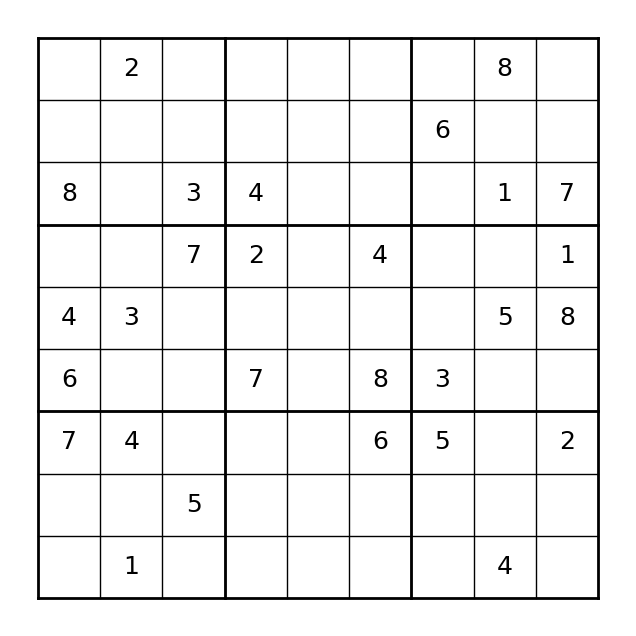

In [6]:
B = [[0, 2, 0, 0, 0, 0, 0, 8, 0],
     [0, 0, 0, 0, 0, 0, 6, 0, 0],
     [8, 0, 3, 4, 0, 0, 0, 1, 7],
     [0, 0, 7, 2, 0, 4, 0, 0, 1],
     [4, 3, 0, 0, 0, 0, 0, 5, 8],
     [6, 0, 0, 7, 0, 8, 3, 0, 0],
     [7, 4, 0, 0, 0, 6, 5, 0, 2],
     [0, 0, 5, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(B)
S.draw()

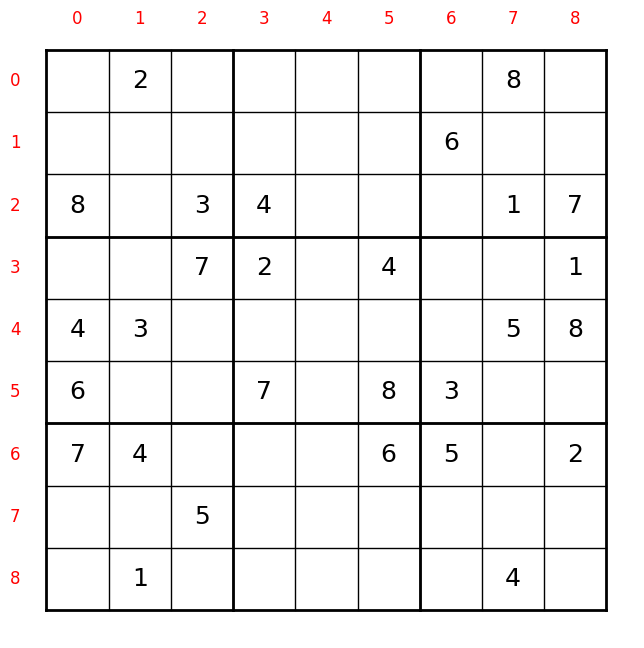

In [7]:
S.draw(show_rc_nums=True, show_valid_vals=True)

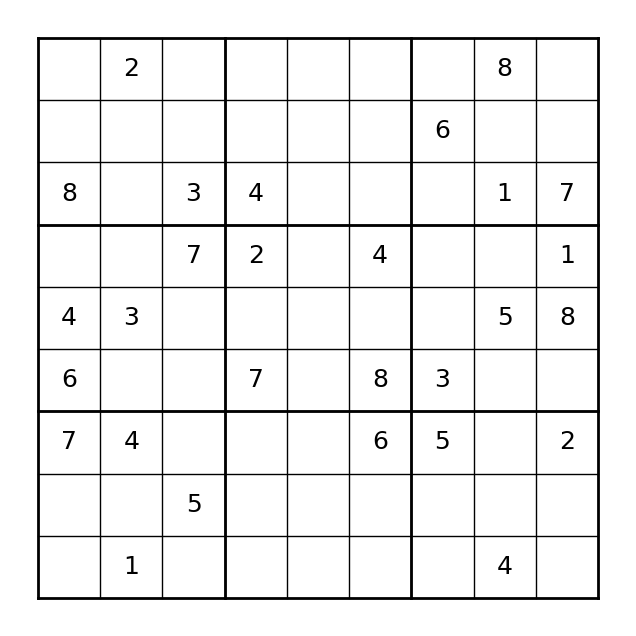

In [8]:
s = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(s)
S.draw()

In [9]:
s = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(s)
S.find_neighbors()
print(S.N.keys())
print(S.N[(0,0)])
print(len(S.N[(0,0)]))

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)])
{(4, 0), (8, 0), (0, 2), (0, 5), (2, 2), (1, 0), (0, 8), (3, 0), (5, 0), (0, 1), (0, 7), (1, 2), (0, 4), (2, 1), (7, 0), (0, 0), (1, 1), (0, 3), (2, 0), (0, 6), (6, 0)}
21


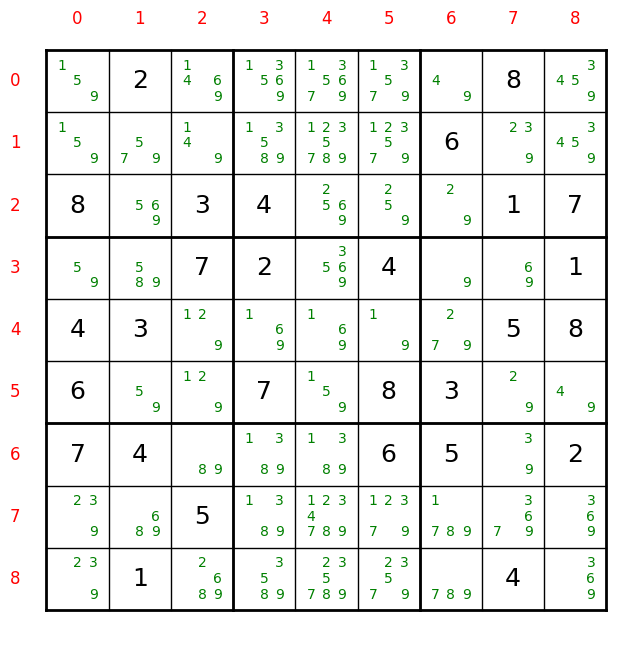

{1, 5, 9}
{9}


In [10]:
s = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(s)
S.find_neighbors()
S.init_valid()
S.draw(show_rc_nums=True, show_valid_vals=True)
print(S.V[(0,0)])
print(S.V[(3,6)])

s = [[0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


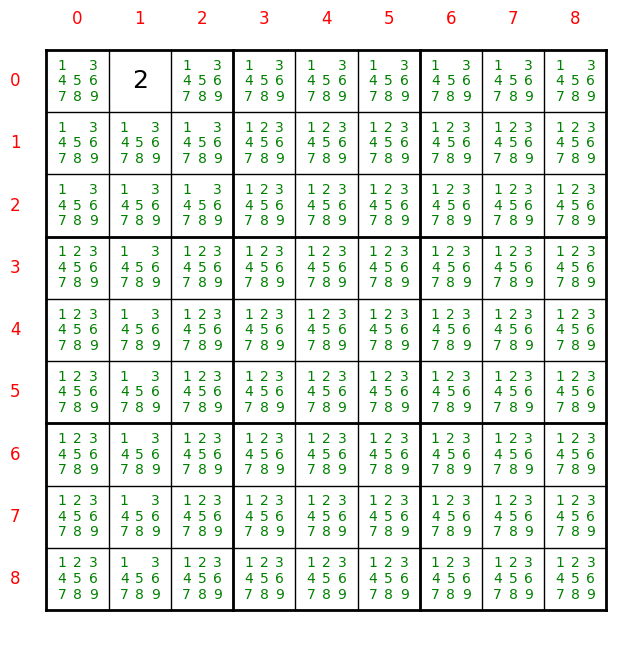

In [11]:
s = [[0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
print('s =',s)
S = Sudoku(s)
S.find_neighbors()
S.init_valid()
S.draw(show_rc_nums=True, show_valid_vals=True)

easy21.txt: [easy21.txt](https://drive.google.com/file/d/134lF_ksWmD_QX2wWf4ng2OX0f9xojG8p/view?usp=sharing)

hard1000.txt: [hard1000.txt](https://drive.google.com/file/d/19uqNlkhwHi-mOJ_k9lRrhjUsTHSicxu3/view?usp=sharing) (Note: There are only 10 puzzles)

Upload easy21.txt file

In [16]:
from google.colab import files
uploaded = files.upload()

Saving easy21.txt to easy21 (1).txt


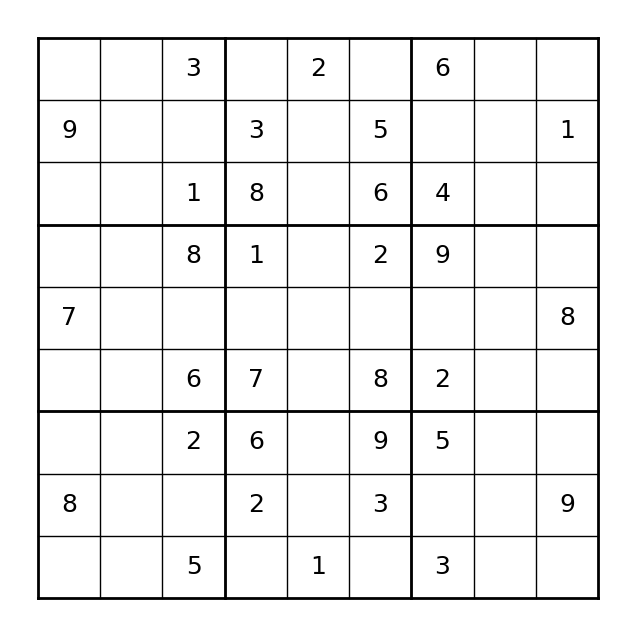

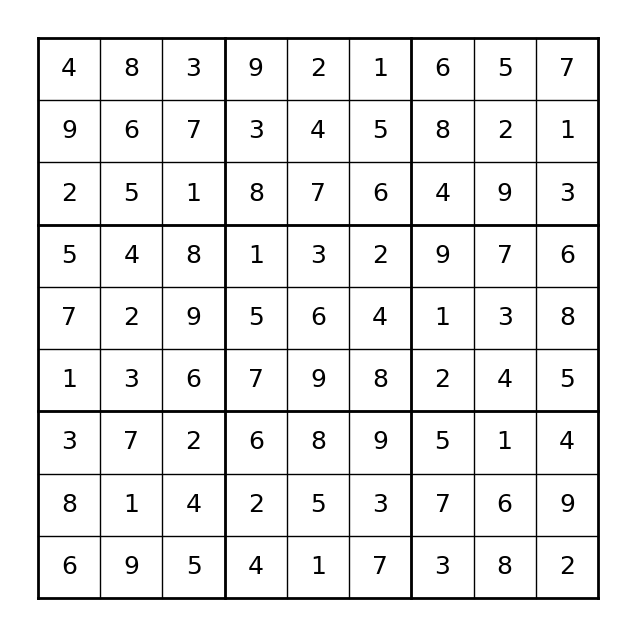

1



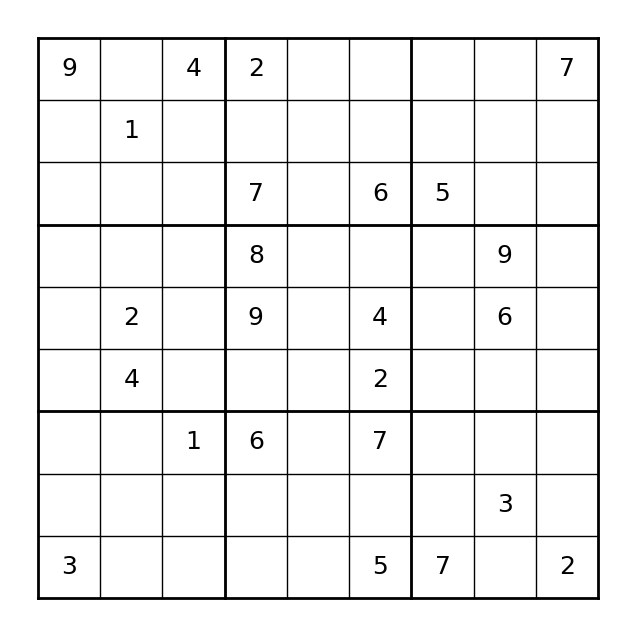

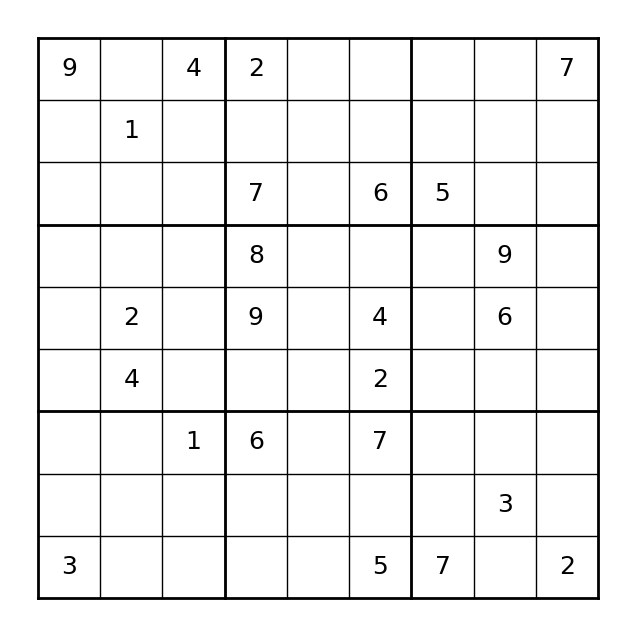

0



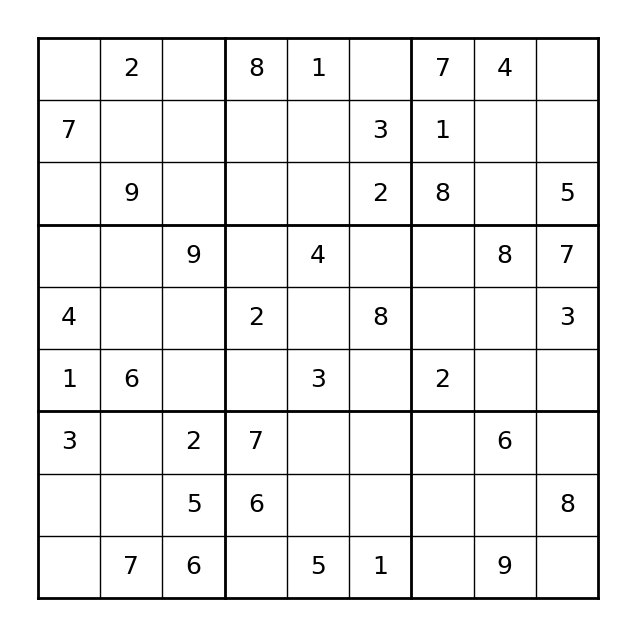

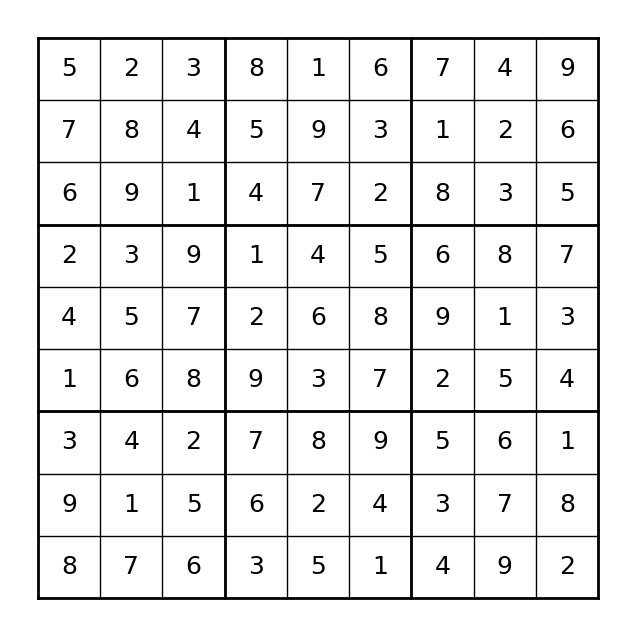

1



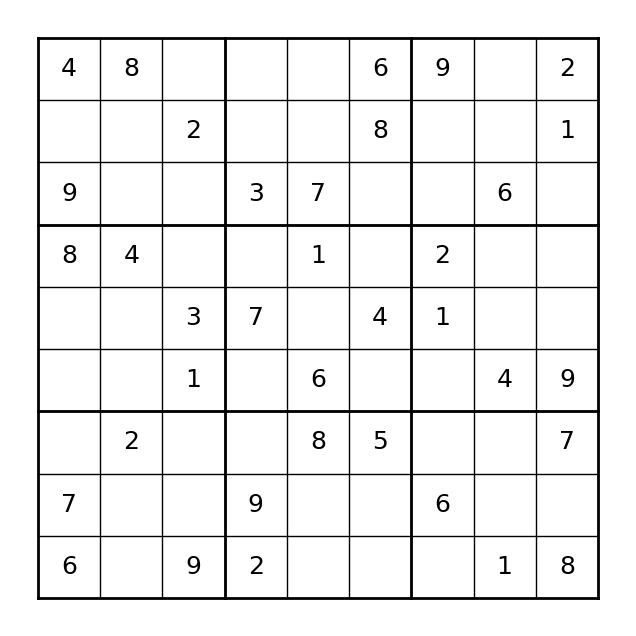

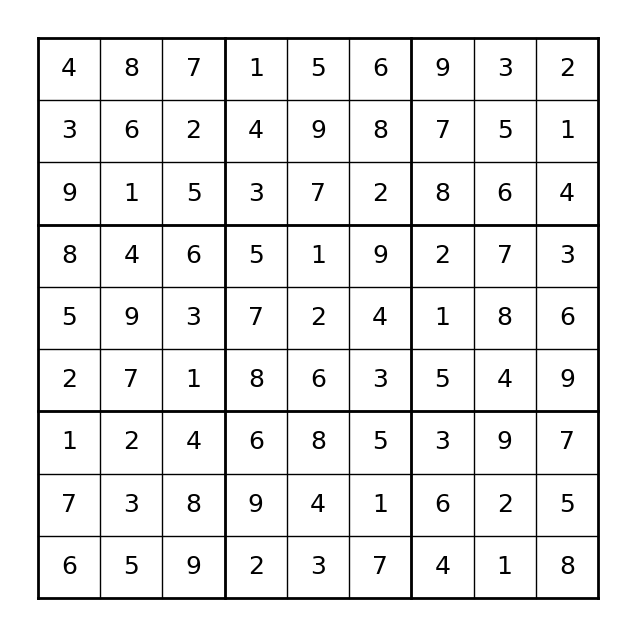

1



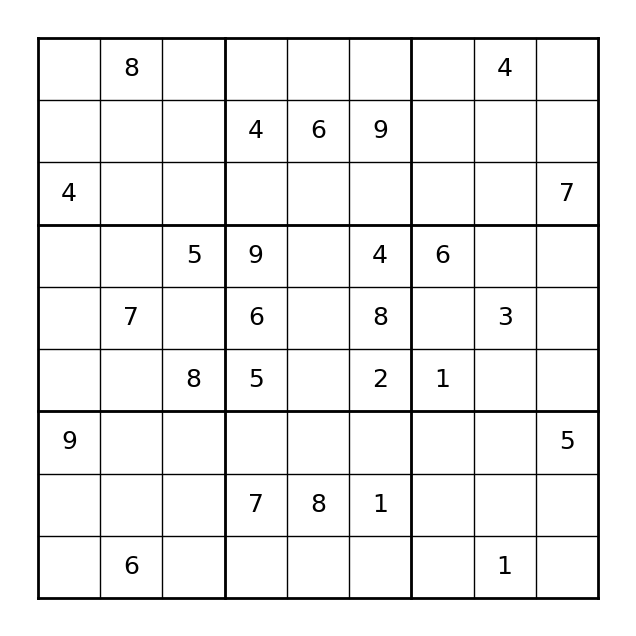

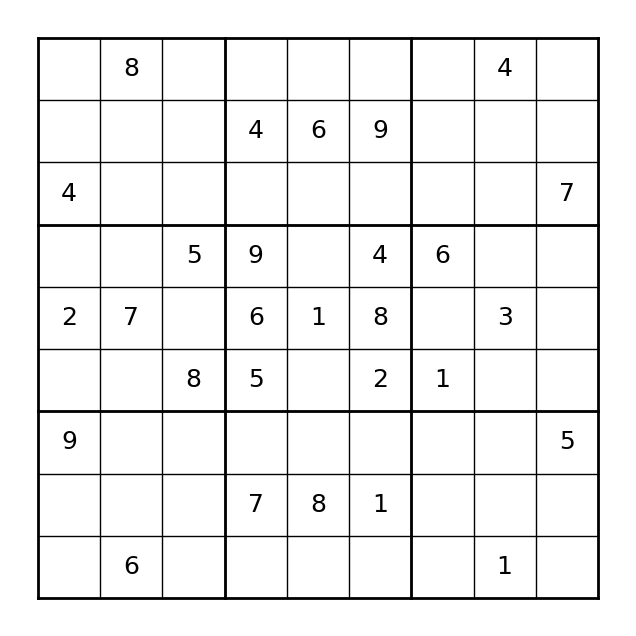

0



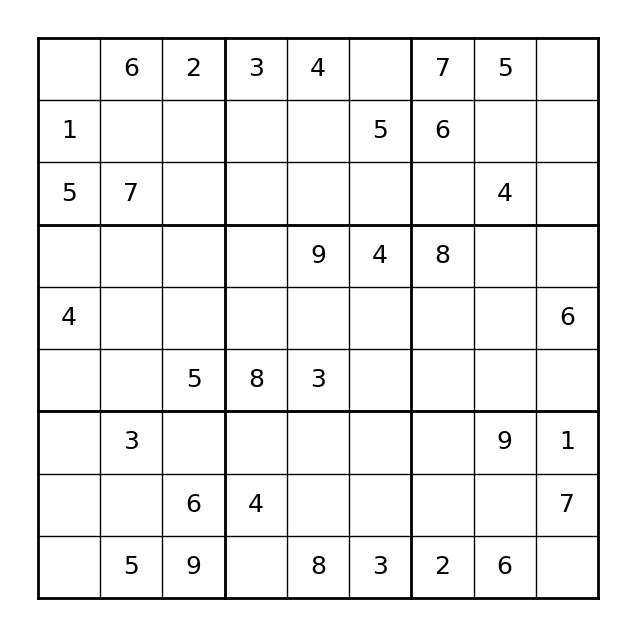

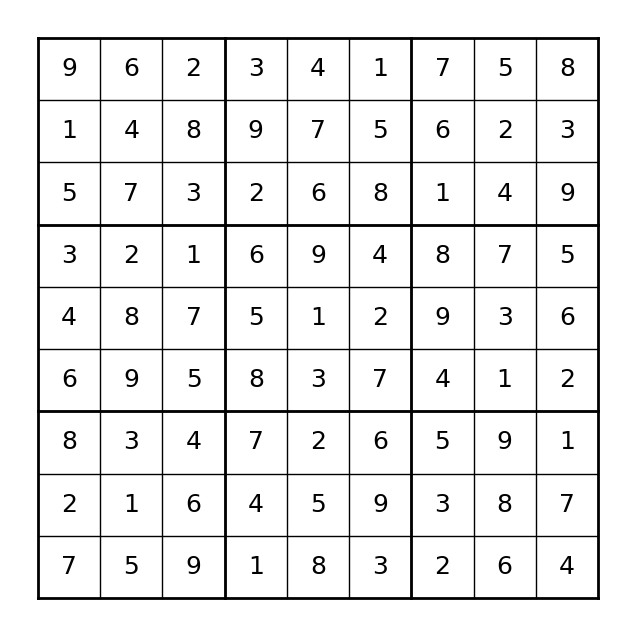

1



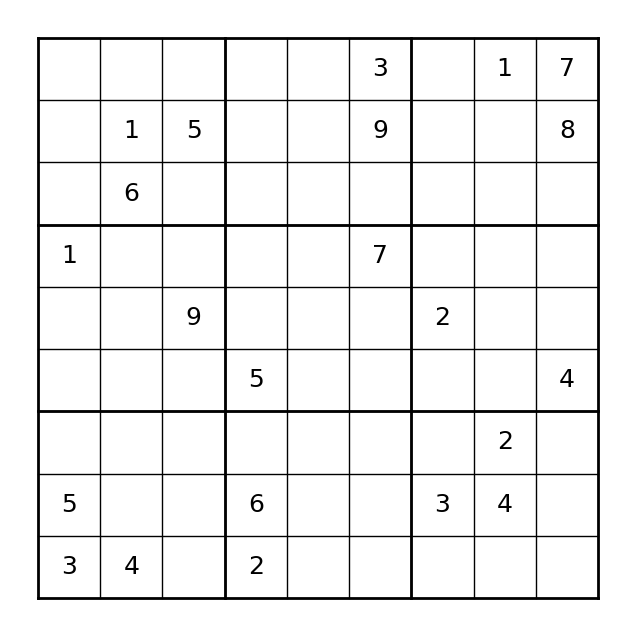

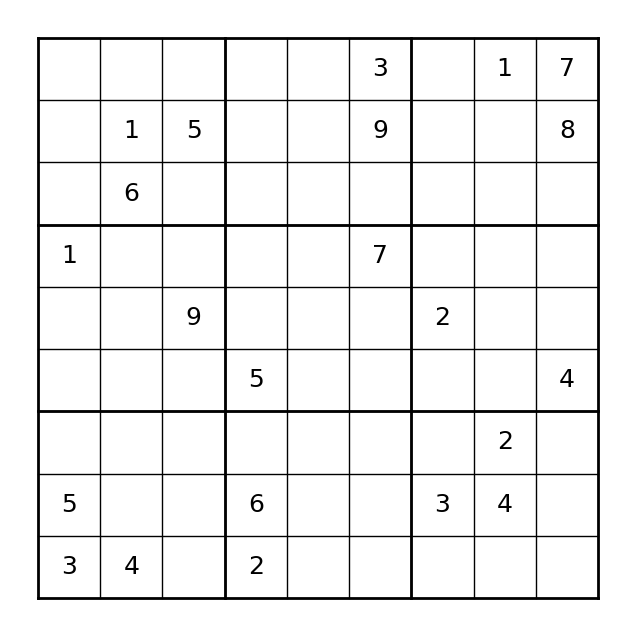

0



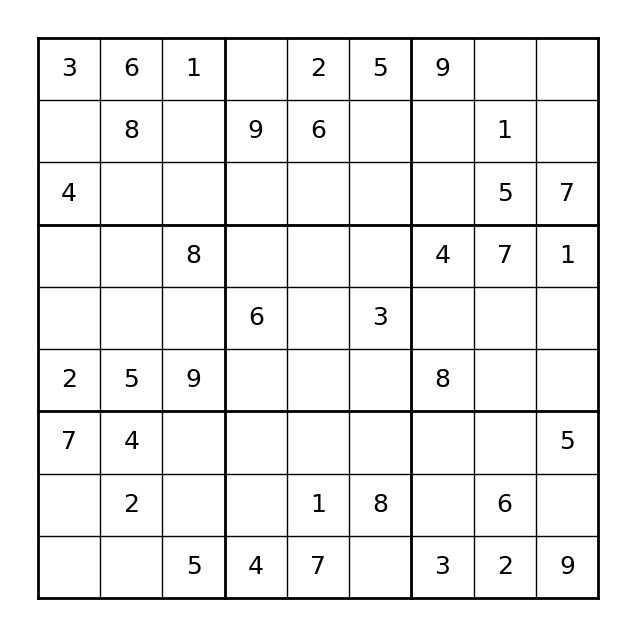

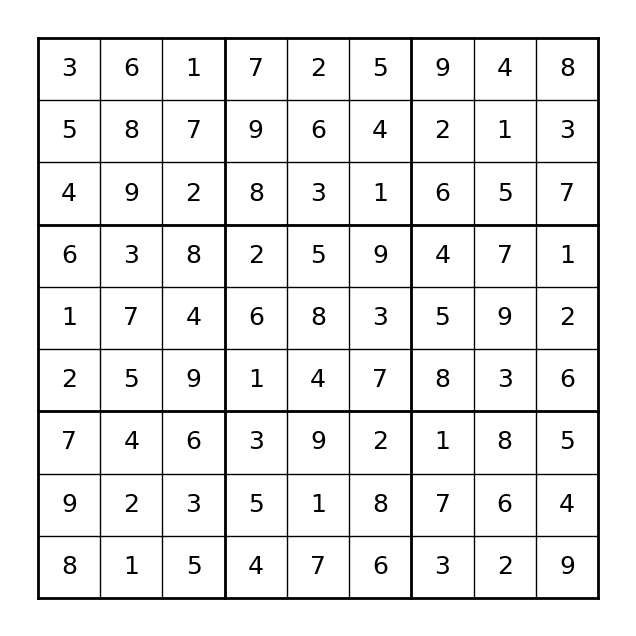

1



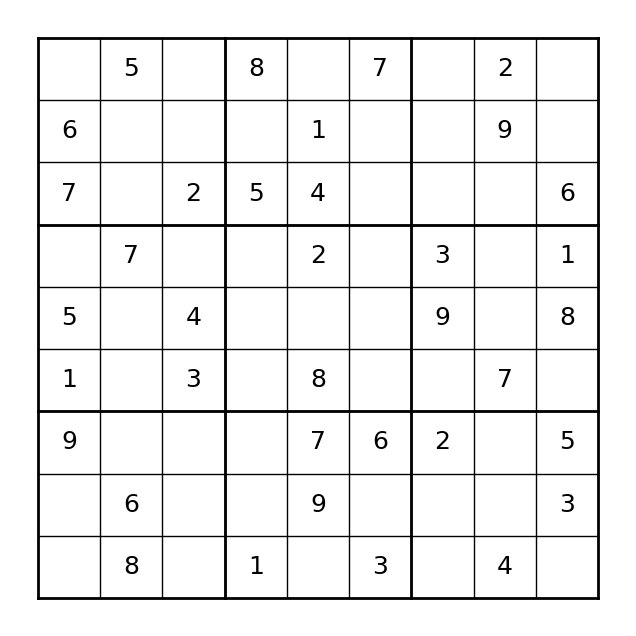

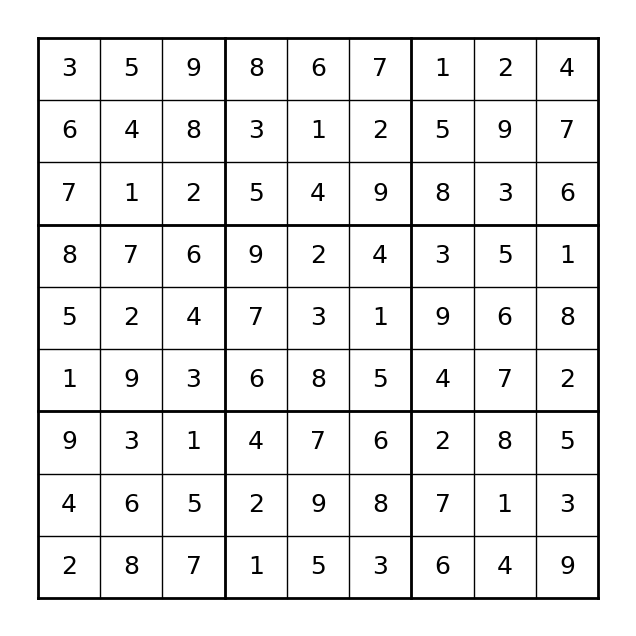

1



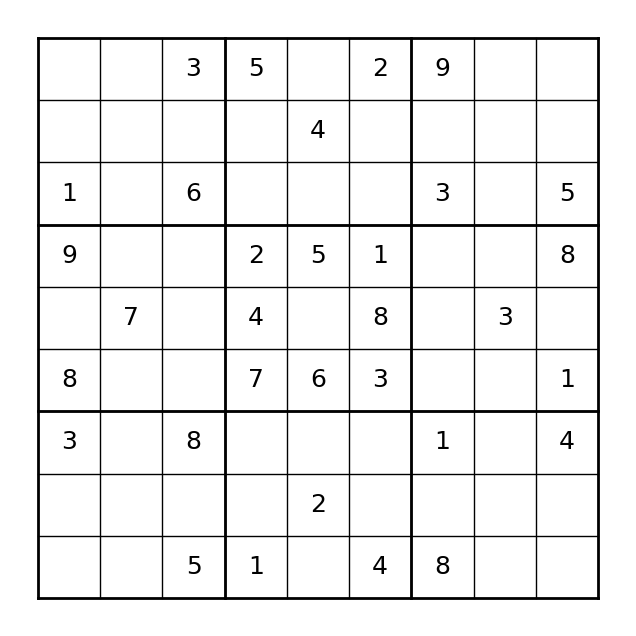

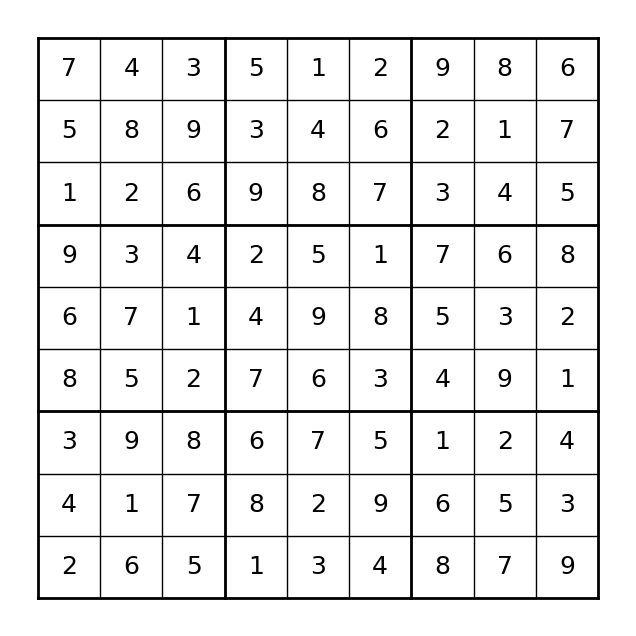

1



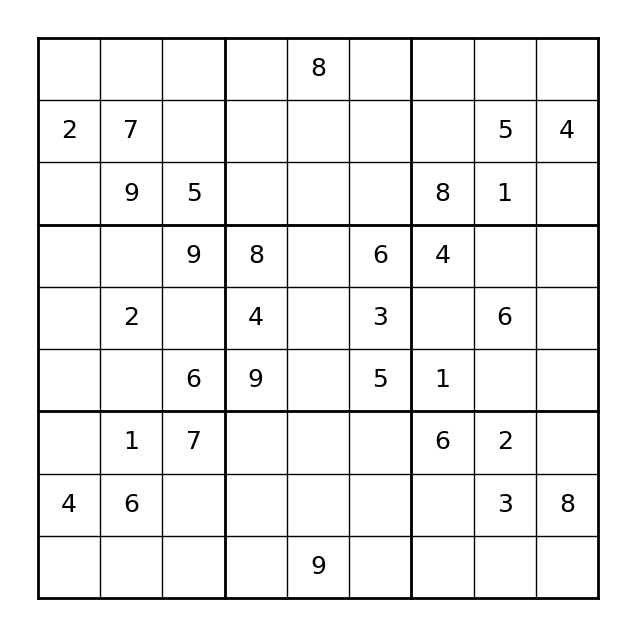

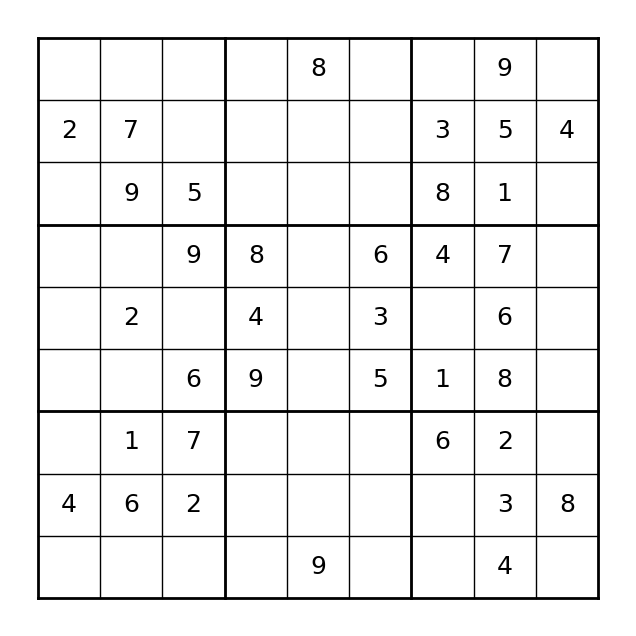

0



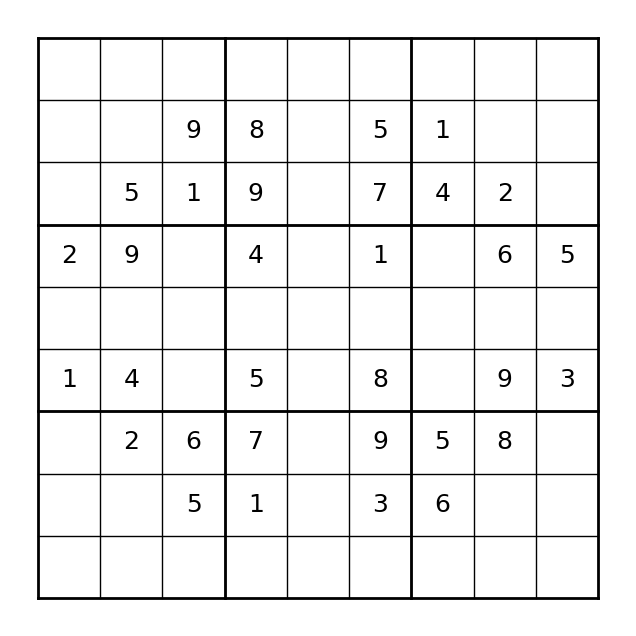

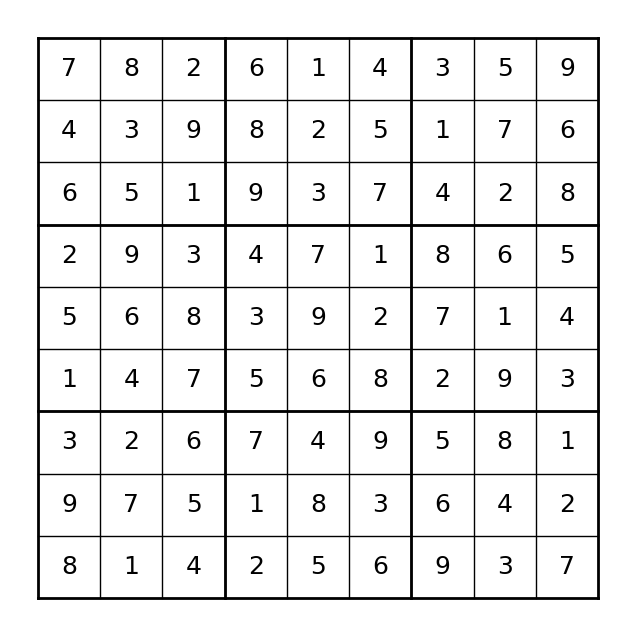

1



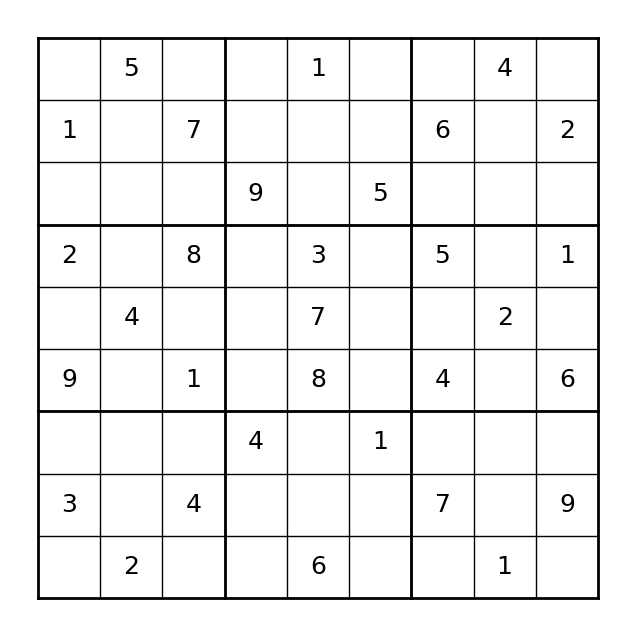

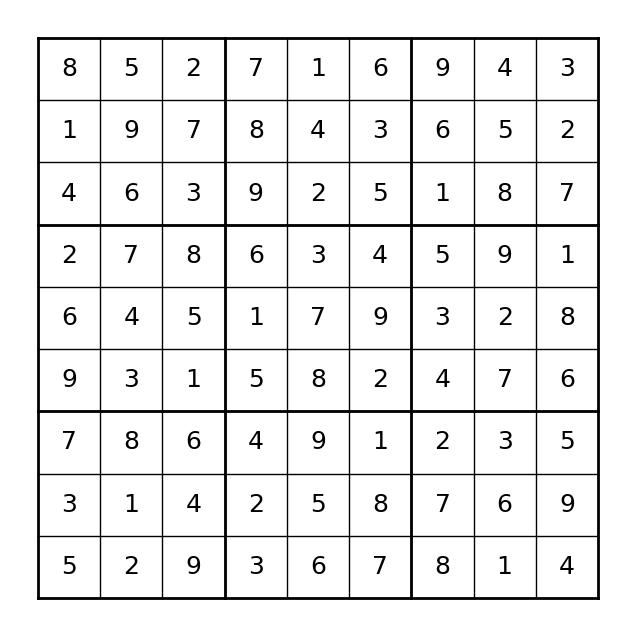

1



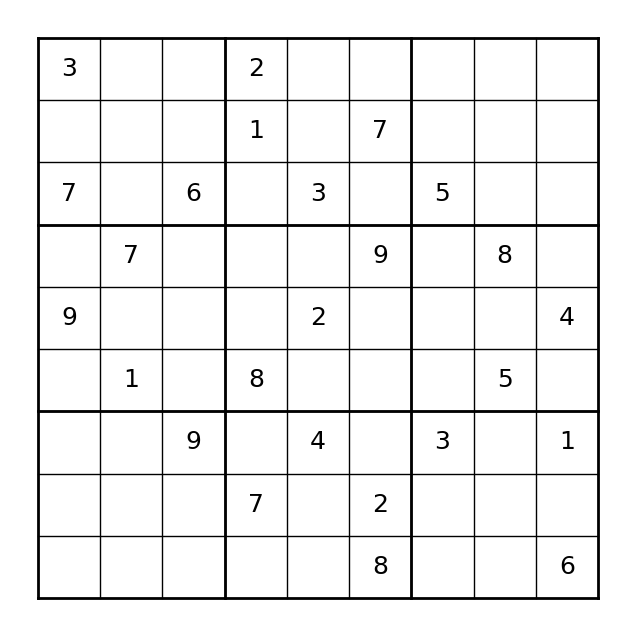

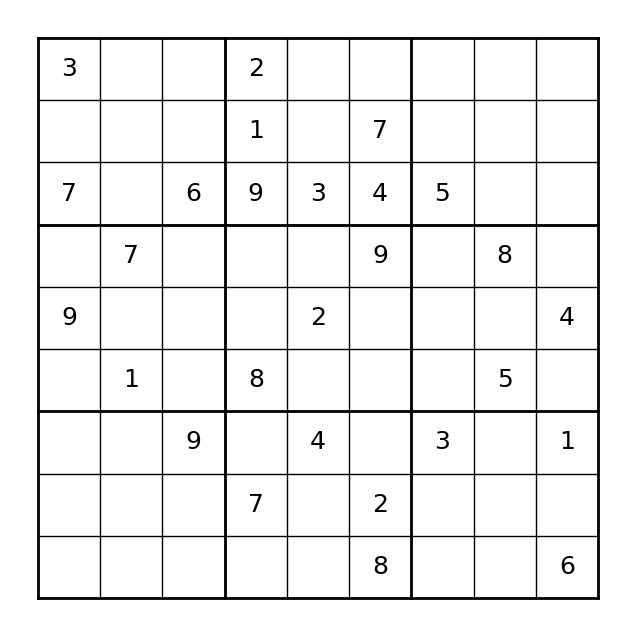

0



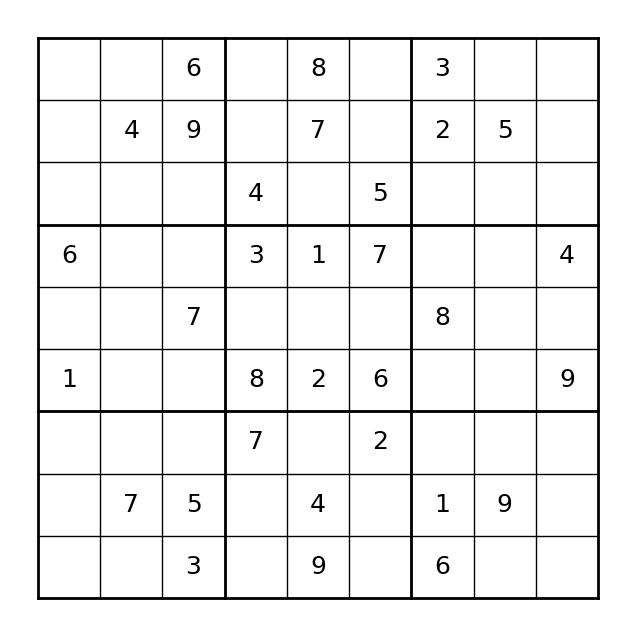

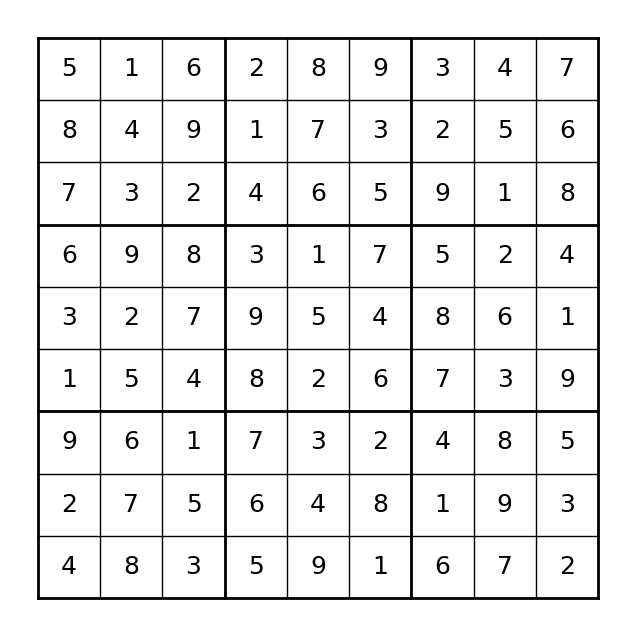

1



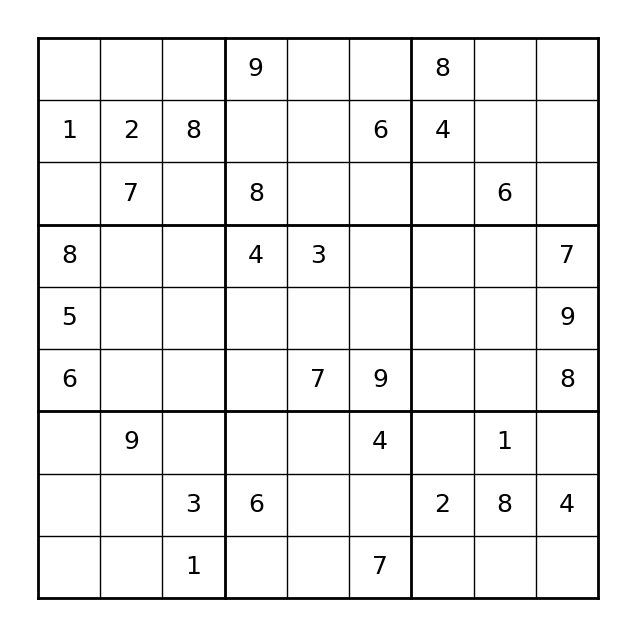

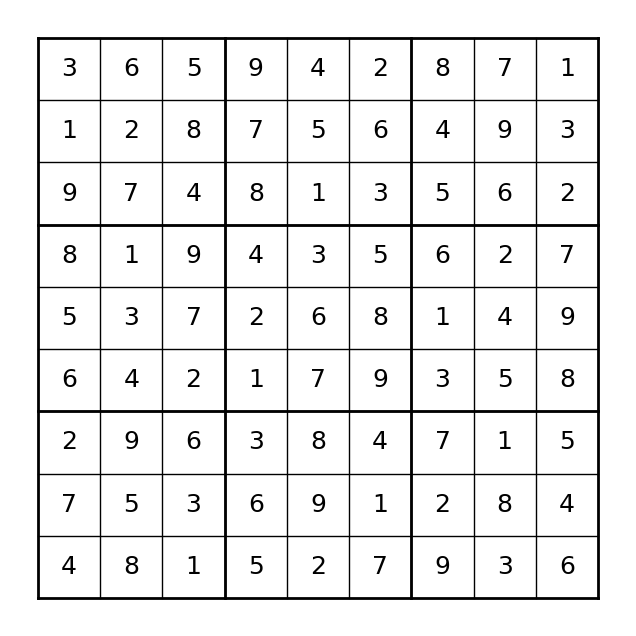

1



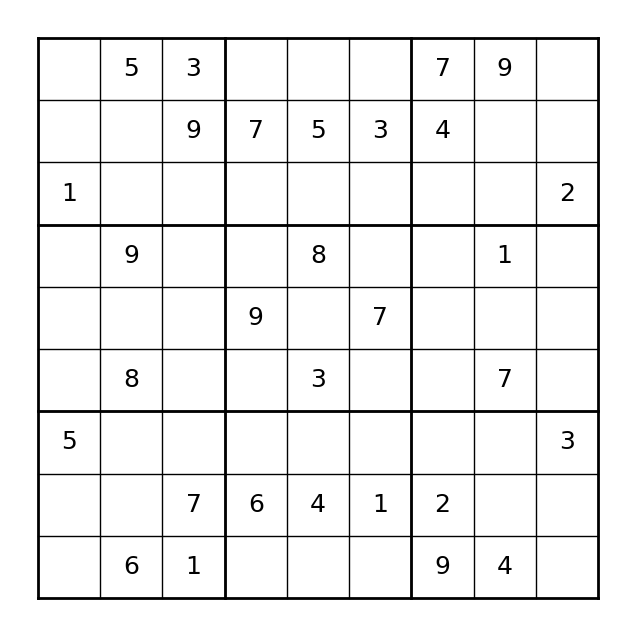

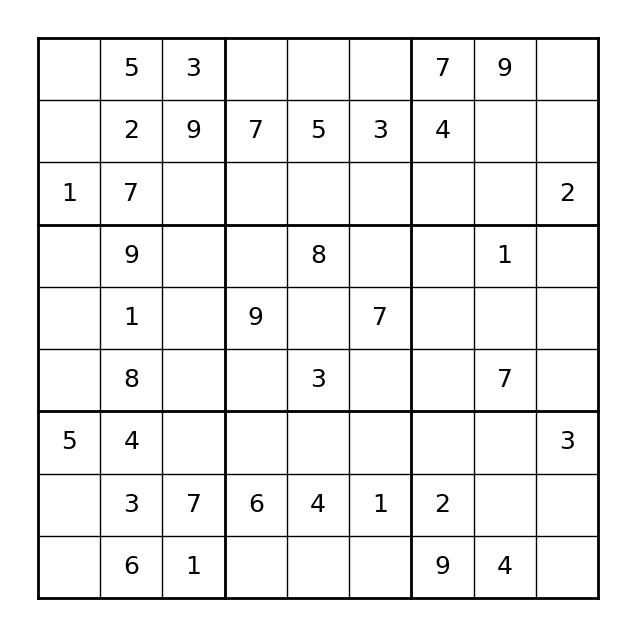

0



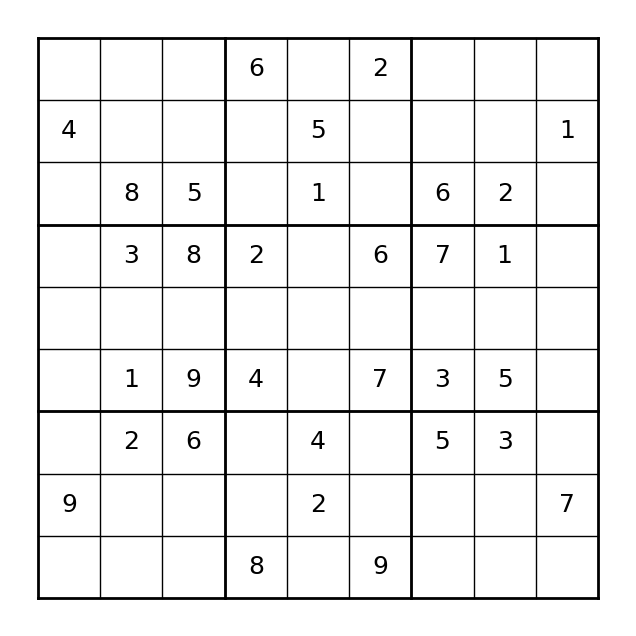

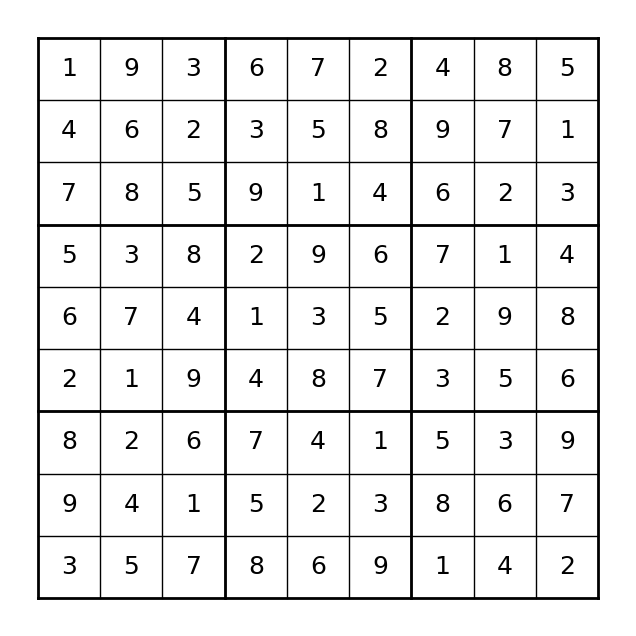

1



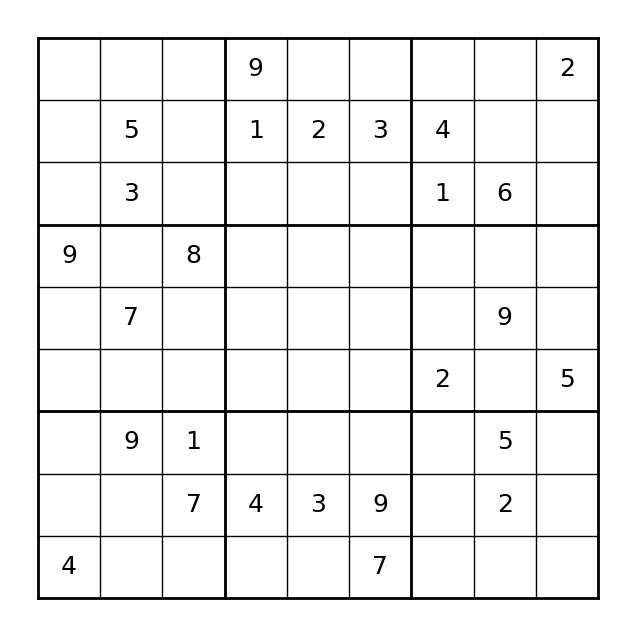

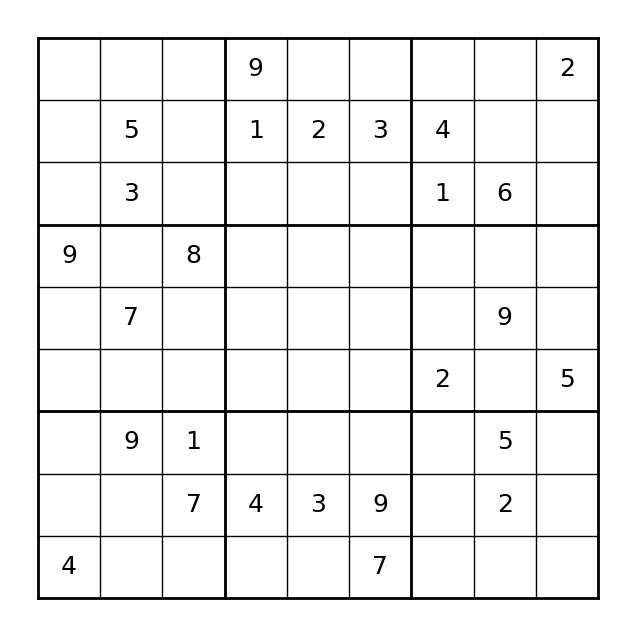

0



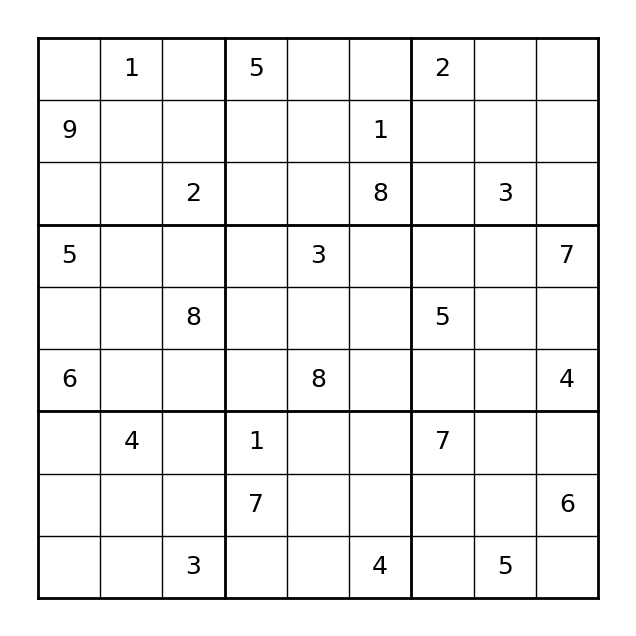

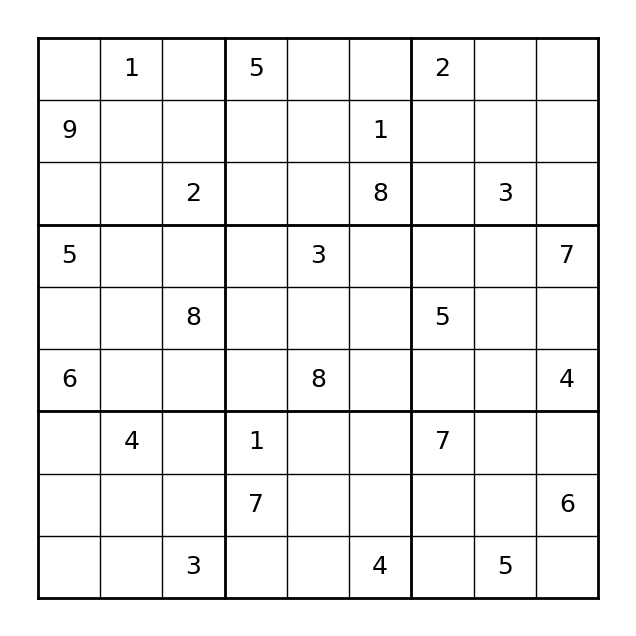

0



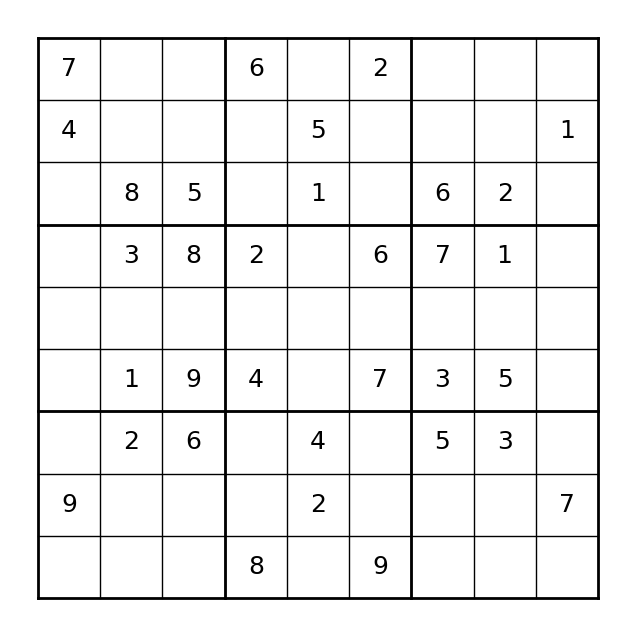

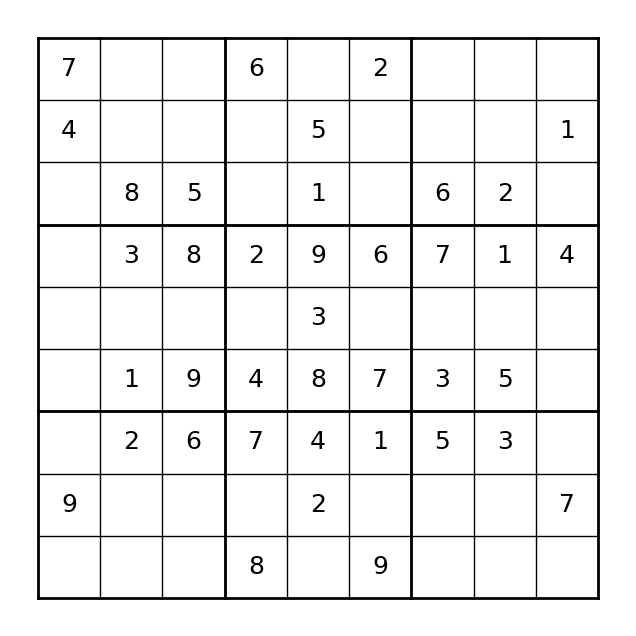

-1

solved puzzles: 12
unsolved puzzles: 8
unsolvable puzzles: 1


In [17]:
f = open("easy21.txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]


def convert_to_board(s):
  board = []
  counter = 0
  row = []
  for c in s:
    if counter == 9:
      board.append(row)
      row = []
      counter = 0
    if c != '.':
      row.append(int(c))
    else:
      row.append(0)
    counter += 1
  if row:
    board.append(row)
  return board

for s in ss:
  board = convert_to_board(s)
  S = Sudoku(board)
  S.draw()
  sol = S.solve()
  S.draw()
  print(sol)
  print()
  count[sol]+=1

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])

```
def solve_backtrack(self):
  if sol == 1: # Solution found
    return sudoku.to_string()
  if sol == -1: # Solution found
    return None
  find unfilled cell (r,c) in self.S
  for every value v in V[(r,c)]:
    assume self.S[r][c] = v
    sol = self.solve_backtrack()
    if sol != None:
        return sol
  return None
```


21 strings read


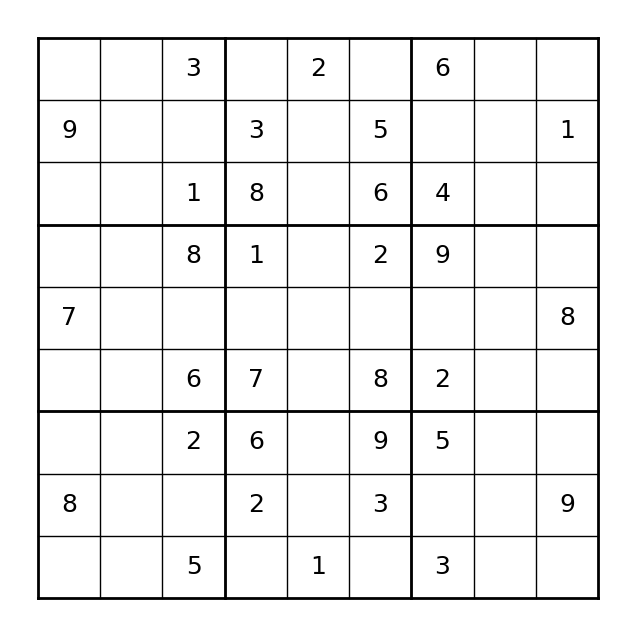

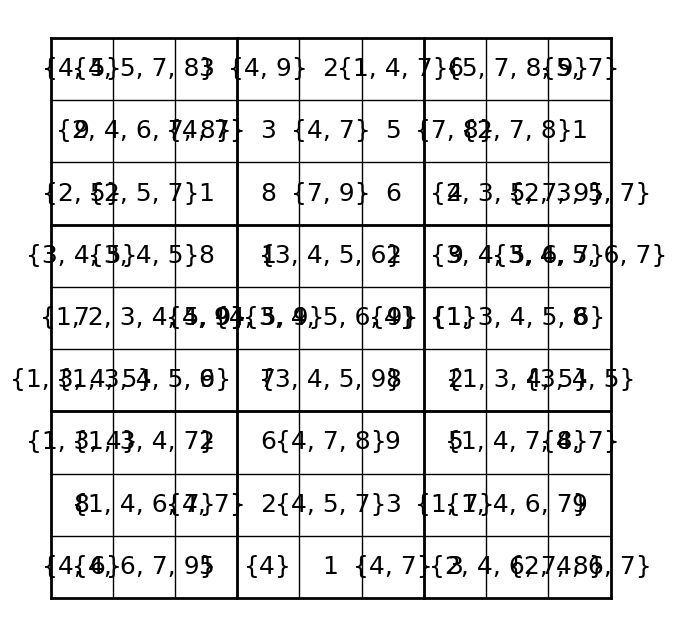

{4, 5} {4, 5, 7, 8} 3 {4, 9} 2 {1, 4, 7} 6 {5, 7, 8, 9} {5, 7}
9 {2, 4, 6, 7, 8} {4, 7} 3 {4, 7} 5 {7, 8} {2, 7, 8} 1
{2, 5} {2, 5, 7} 1 8 {7, 9} 6 4 {2, 3, 5, 7, 9} {2, 3, 5, 7}
{3, 4, 5} {3, 4, 5} 8 1 {3, 4, 5, 6} 2 9 {3, 4, 5, 6, 7} {3, 4, 5, 6, 7}
7 {1, 2, 3, 4, 5, 9} {4, 9} {4, 5, 9} {3, 4, 5, 6, 9} {4} {1} {1, 3, 4, 5, 6} 8
{1, 3, 4, 5} {1, 3, 4, 5, 9} 6 7 {3, 4, 5, 9} 8 2 {1, 3, 4, 5} {3, 4, 5}
{1, 3, 4} {1, 3, 4, 7} 2 6 {4, 7, 8} 9 5 {1, 4, 7, 8} {4, 7}
8 {1, 4, 6, 7} {4, 7} 2 {4, 5, 7} 3 {1, 7} {1, 4, 6, 7} 9
{4, 6} {4, 6, 7, 9} 5 {4} 1 {4, 7} 3 {2, 4, 6, 7, 8} {2, 4, 6, 7}


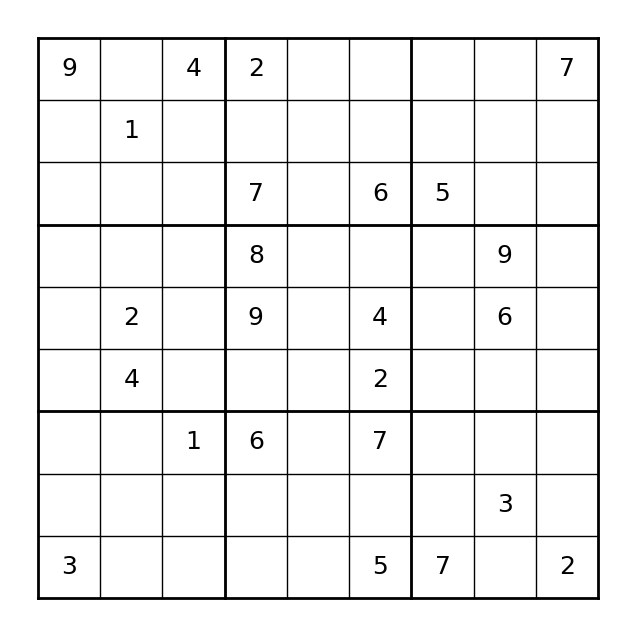

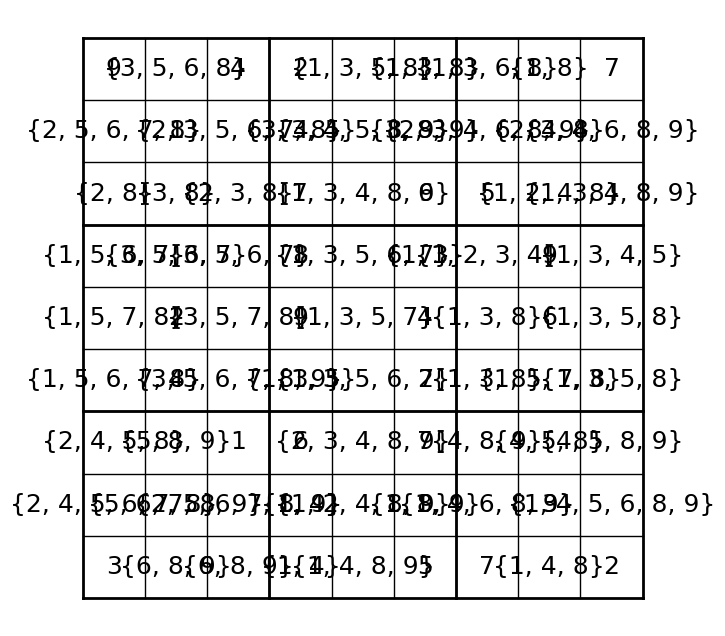

9 {3, 5, 6, 8} 4 2 {1, 3, 5, 8} {1, 3, 8} {1, 3, 6, 8} {1, 8} 7
{2, 5, 6, 7, 8} 1 {2, 3, 5, 6, 7, 8} {3, 4, 5} {3, 4, 5, 8, 9} {3, 8, 9} {2, 3, 4, 6, 8, 9} {2, 4, 8} {3, 4, 6, 8, 9}
{2, 8} {3, 8} {2, 3, 8} 7 {1, 3, 4, 8, 9} 6 5 {1, 2, 4, 8} {1, 3, 4, 8, 9}
{1, 5, 6, 7} {3, 5, 6, 7} {3, 5, 6, 7} 8 {1, 3, 5, 6, 7} {1, 3} {1, 2, 3, 4} 9 {1, 3, 4, 5}
{1, 5, 7, 8} 2 {3, 5, 7, 8} 9 {1, 3, 5, 7} 4 {1, 3, 8} 6 {1, 3, 5, 8}
{1, 5, 6, 7, 8} 4 {3, 5, 6, 7, 8, 9} {1, 3, 5} {1, 3, 5, 6, 7} 2 {1, 3, 8} {1, 5, 7, 8} {1, 3, 5, 8}
{2, 4, 5, 8} {5, 8, 9} 1 6 {2, 3, 4, 8, 9} 7 {4, 8, 9} {4, 5, 8} {4, 5, 8, 9}
{2, 4, 5, 6, 7, 8} {5, 6, 7, 8, 9} {2, 5, 6, 7, 8, 9} {1, 4} {1, 2, 4, 8, 9} {1, 8, 9} {1, 4, 6, 8, 9} 3 {1, 4, 5, 6, 8, 9}
3 {6, 8, 9} {6, 8, 9} {1, 4} {1, 4, 8, 9} 5 7 {1, 4, 8} 2


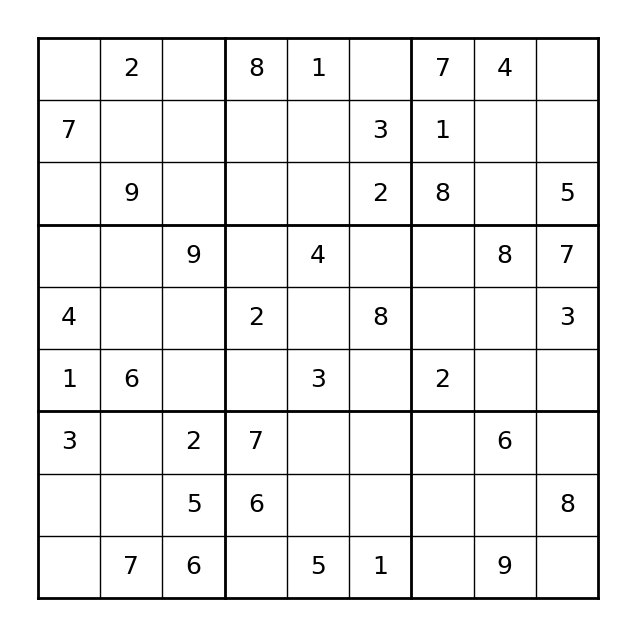

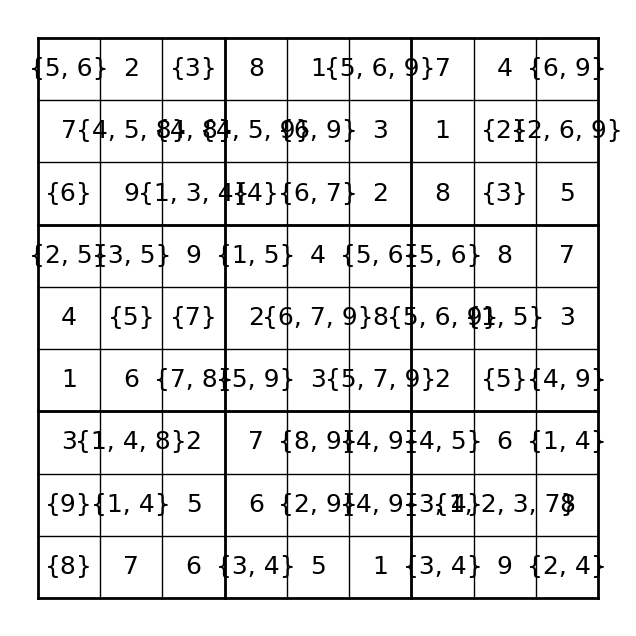

{5, 6} 2 {3} 8 1 {5, 6, 9} 7 4 {6, 9}
7 {4, 5, 8} {4, 8} {4, 5, 9} {6, 9} 3 1 {2} {2, 6, 9}
{6} 9 {1, 3, 4} {4} {6, 7} 2 8 {3} 5
{2, 5} {3, 5} 9 {1, 5} 4 {5, 6} {5, 6} 8 7
4 {5} {7} 2 {6, 7, 9} 8 {5, 6, 9} {1, 5} 3
1 6 {7, 8} {5, 9} 3 {5, 7, 9} 2 {5} {4, 9}
3 {1, 4, 8} 2 7 {8, 9} {4, 9} {4, 5} 6 {1, 4}
{9} {1, 4} 5 6 {2, 9} {4, 9} {3, 4} {1, 2, 3, 7} 8
{8} 7 6 {3, 4} 5 1 {3, 4} 9 {2, 4}


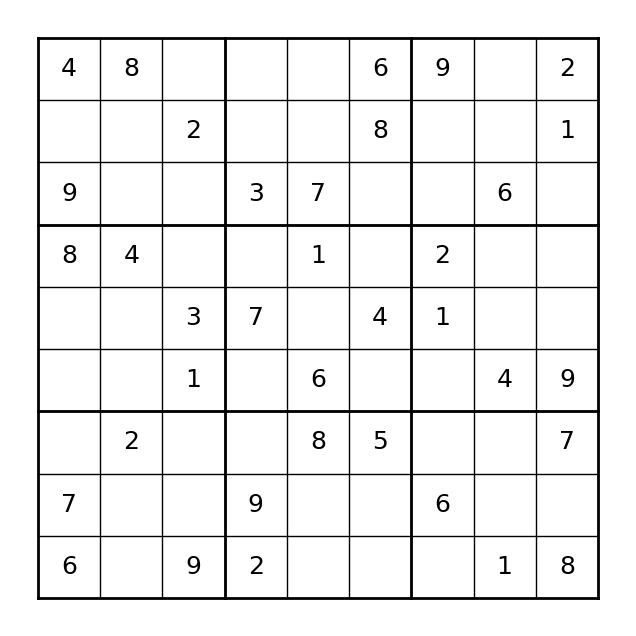

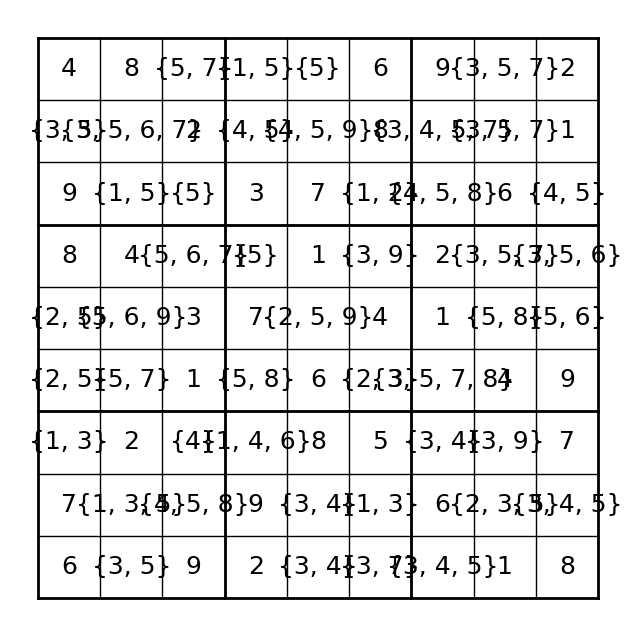

4 8 {5, 7} {1, 5} {5} 6 9 {3, 5, 7} 2
{3, 5} {3, 5, 6, 7} 2 {4, 5} {4, 5, 9} 8 {3, 4, 5, 7} {3, 5, 7} 1
9 {1, 5} {5} 3 7 {1, 2} {4, 5, 8} 6 {4, 5}
8 4 {5, 6, 7} {5} 1 {3, 9} 2 {3, 5, 7} {3, 5, 6}
{2, 5} {5, 6, 9} 3 7 {2, 5, 9} 4 1 {5, 8} {5, 6}
{2, 5} {5, 7} 1 {5, 8} 6 {2, 3} {3, 5, 7, 8} 4 9
{1, 3} 2 {4} {1, 4, 6} 8 5 {3, 4} {3, 9} 7
7 {1, 3, 5} {4, 5, 8} 9 {3, 4} {1, 3} 6 {2, 3, 5} {3, 4, 5}
6 {3, 5} 9 2 {3, 4} {3, 7} {3, 4, 5} 1 8


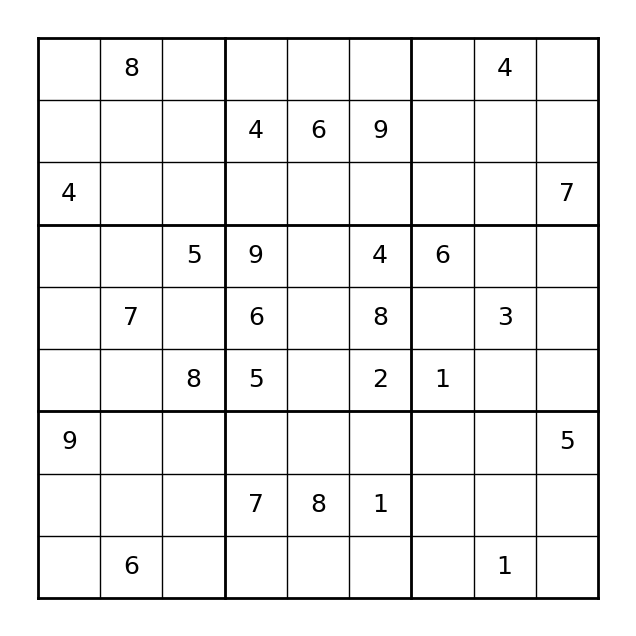

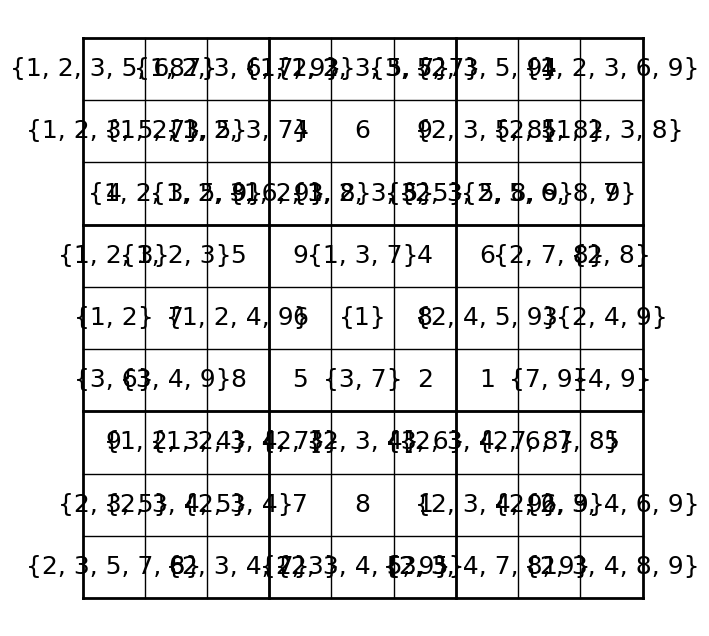

{1, 2, 3, 5, 6, 7} 8 {1, 2, 3, 6, 7, 9} {1, 2, 3} {1, 2, 3, 5, 7} {3, 5, 7} {2, 3, 5, 9} 4 {1, 2, 3, 6, 9}
{1, 2, 3, 5, 7} {1, 2, 3, 5} {1, 2, 3, 7} 4 6 9 {2, 3, 5, 8} {2, 5, 8} {1, 2, 3, 8}
4 {1, 2, 3, 5, 9} {1, 2, 3, 6, 9} {1, 2, 3, 8} {1, 2, 3, 5} {3, 5} {2, 3, 5, 8, 9} {2, 5, 6, 8, 9} 7
{1, 2, 3} {1, 2, 3} 5 9 {1, 3, 7} 4 6 {2, 7, 8} {2, 8}
{1, 2} 7 {1, 2, 4, 9} 6 {1} 8 {2, 4, 5, 9} 3 {2, 4, 9}
{3, 6} {3, 4, 9} 8 5 {3, 7} 2 1 {7, 9} {4, 9}
9 {1, 2, 3, 4} {1, 2, 3, 4, 7} {2, 3} {2, 3, 4} {3, 6} {2, 3, 4, 7, 8} {2, 6, 7, 8} 5
{2, 3, 5} {2, 3, 4, 5} {2, 3, 4} 7 8 1 {2, 3, 4, 9} {2, 6, 9} {2, 3, 4, 6, 9}
{2, 3, 5, 7, 8} 6 {2, 3, 4, 7} {2, 3} {2, 3, 4, 5, 9} {3, 5} {2, 3, 4, 7, 8, 9} 1 {2, 3, 4, 8, 9}


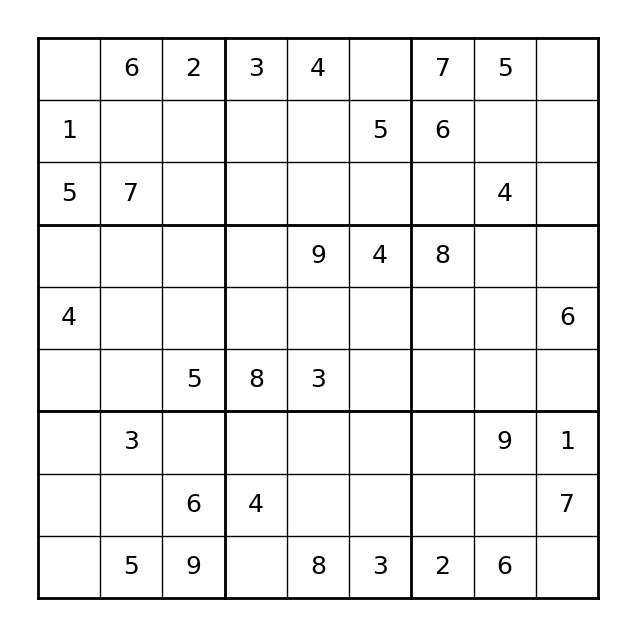

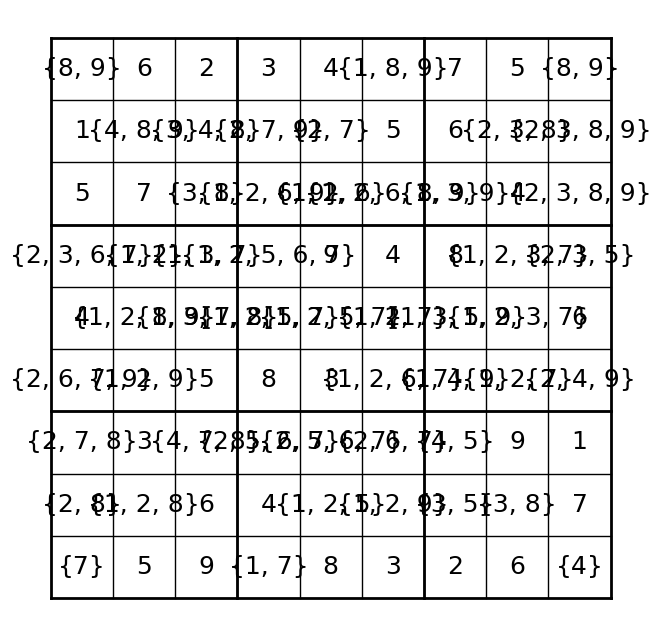

{8, 9} 6 2 3 4 {1, 8, 9} 7 5 {8, 9}
1 {4, 8, 9} {3, 4, 8} {2, 7, 9} {2, 7} 5 6 {2, 3, 8} {2, 3, 8, 9}
5 7 {3, 8} {1, 2, 6, 9} {1, 2, 6} {1, 2, 6, 8, 9} {1, 3, 9} 4 {2, 3, 8, 9}
{2, 3, 6, 7} {1, 2} {1, 3, 7} {1, 2, 5, 6, 7} 9 4 8 {1, 2, 3, 7} {2, 3, 5}
4 {1, 2, 8, 9} {1, 3, 7, 8} {1, 2, 5, 7} {1, 2, 5, 7} {1, 2, 7} {1, 3, 5, 9} {1, 2, 3, 7} 6
{2, 6, 7, 9} {1, 2, 9} 5 8 3 {1, 2, 6, 7} {1, 4, 9} {1, 2, 7} {2, 4, 9}
{2, 7, 8} 3 {4, 7, 8} {2, 5, 6, 7} {2, 5, 6, 7} {2, 6, 7} {4, 5} 9 1
{2, 8} {1, 2, 8} 6 4 {1, 2, 5} {1, 2, 9} {3, 5} {3, 8} 7
{7} 5 9 {1, 7} 8 3 2 6 {4}


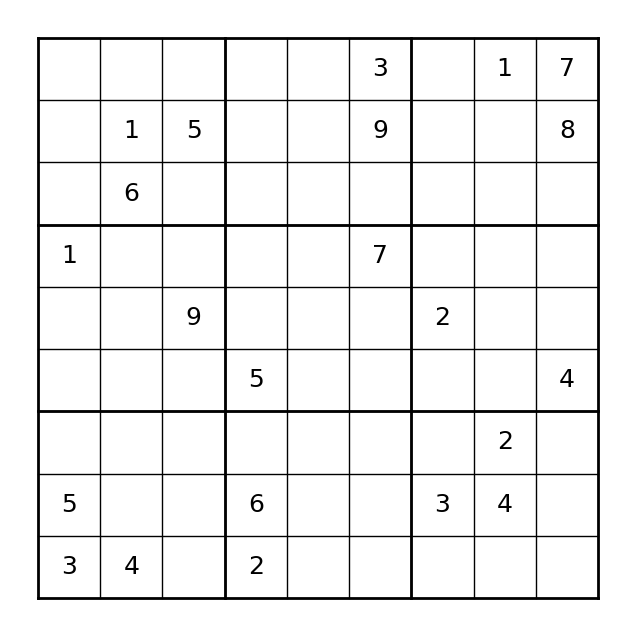

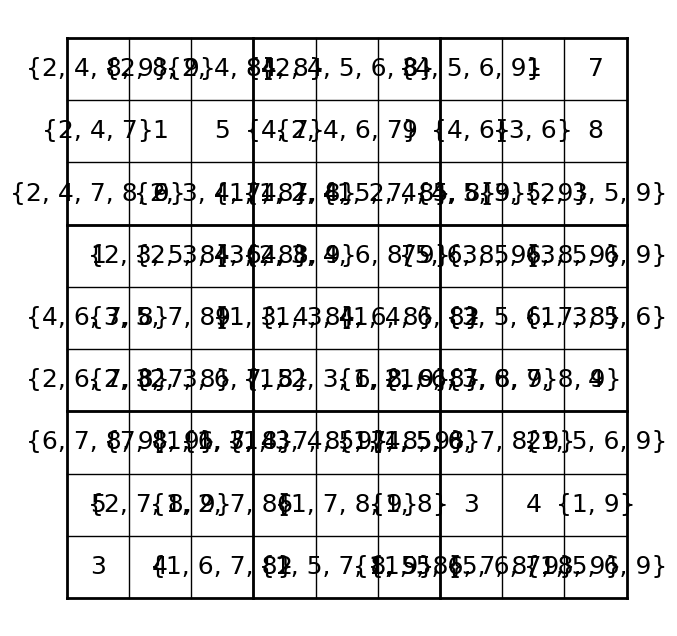

{2, 4, 8, 9} {2, 8, 9} {2, 4, 8} {4, 8} {2, 4, 5, 6, 8} 3 {4, 5, 6, 9} 1 7
{2, 4, 7} 1 5 {4, 7} {2, 4, 6, 7} 9 {4, 6} {3, 6} 8
{2, 4, 7, 8, 9} 6 {2, 3, 4, 7, 8} {1, 4, 7, 8} {1, 2, 4, 5, 7, 8} {1, 2, 4, 5, 8} {4, 5, 9} {3, 5, 9} {2, 3, 5, 9}
1 {2, 3, 5, 8} {2, 3, 4, 6, 8} {3, 4, 8, 9} {2, 3, 4, 6, 8, 9} 7 {5, 6, 8, 9} {3, 5, 6, 8, 9} {3, 5, 6, 9}
{4, 6, 7, 8} {3, 5, 7, 8} 9 {1, 3, 4, 8} {1, 3, 4, 6, 8} {1, 4, 6, 8} 2 {3, 5, 6, 7, 8} {1, 3, 5, 6}
{2, 6, 7, 8} {2, 3, 7, 8} {2, 3, 6, 7, 8} 5 {1, 2, 3, 6, 8, 9} {1, 2, 6, 8} {1, 6, 7, 8, 9} {3, 6, 7, 8, 9} 4
{6, 7, 8, 9} {7, 8, 9} {1, 6, 7, 8} {1, 3, 4, 7, 8, 9} {1, 3, 4, 5, 7, 8, 9} {1, 4, 5, 8} {1, 5, 6, 7, 8, 9} 2 {1, 5, 6, 9}
5 {2, 7, 8, 9} {1, 2, 7, 8} 6 {1, 7, 8, 9} {1, 8} 3 4 {1, 9}
3 4 {1, 6, 7, 8} 2 {1, 5, 7, 8, 9} {1, 5, 8} {1, 5, 6, 7, 8, 9} {5, 6, 7, 8, 9} {1, 5, 6, 9}


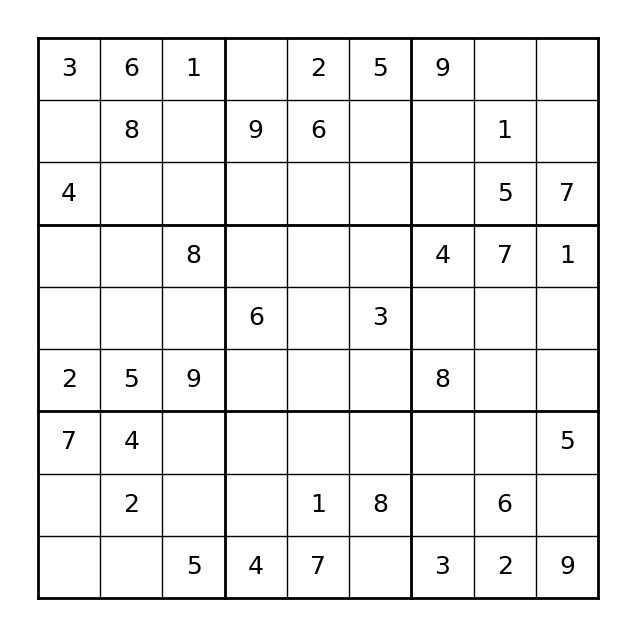

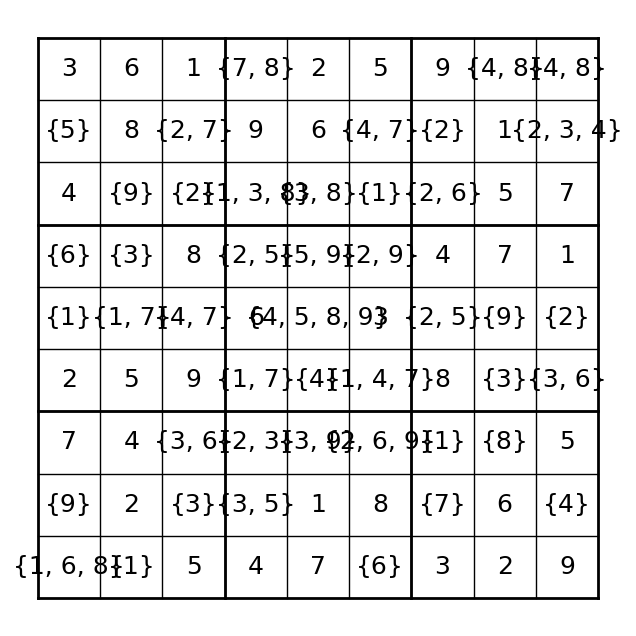

3 6 1 {7, 8} 2 5 9 {4, 8} {4, 8}
{5} 8 {2, 7} 9 6 {4, 7} {2} 1 {2, 3, 4}
4 {9} {2} {1, 3, 8} {3, 8} {1} {2, 6} 5 7
{6} {3} 8 {2, 5} {5, 9} {2, 9} 4 7 1
{1} {1, 7} {4, 7} 6 {4, 5, 8, 9} 3 {2, 5} {9} {2}
2 5 9 {1, 7} {4} {1, 4, 7} 8 {3} {3, 6}
7 4 {3, 6} {2, 3} {3, 9} {2, 6, 9} {1} {8} 5
{9} 2 {3} {3, 5} 1 8 {7} 6 {4}
{1, 6, 8} {1} 5 4 7 {6} 3 2 9


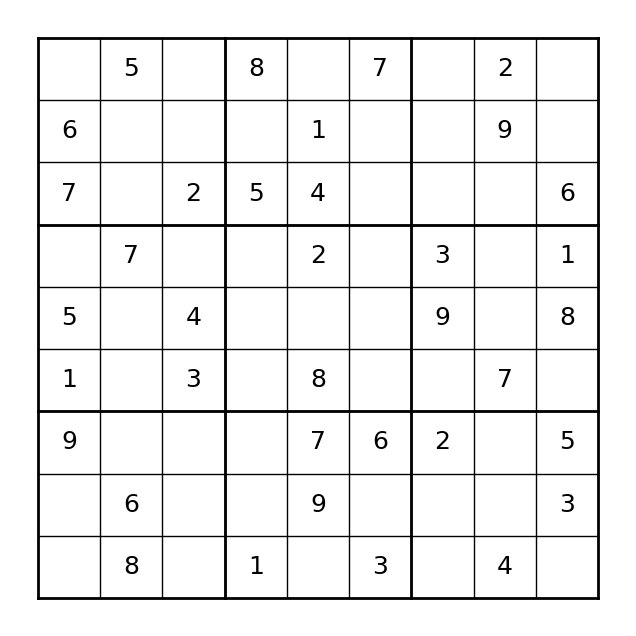

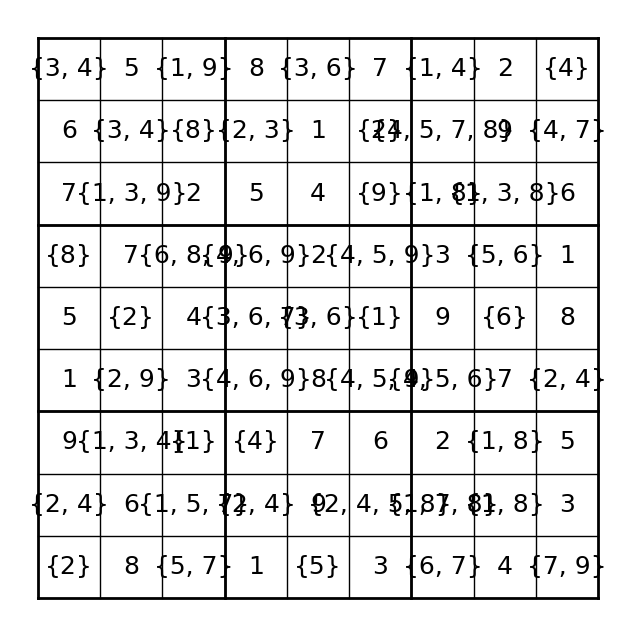

{3, 4} 5 {1, 9} 8 {3, 6} 7 {1, 4} 2 {4}
6 {3, 4} {8} {2, 3} 1 {2} {4, 5, 7, 8} 9 {4, 7}
7 {1, 3, 9} 2 5 4 {9} {1, 8} {1, 3, 8} 6
{8} 7 {6, 8, 9} {4, 6, 9} 2 {4, 5, 9} 3 {5, 6} 1
5 {2} 4 {3, 6, 7} {3, 6} {1} 9 {6} 8
1 {2, 9} 3 {4, 6, 9} 8 {4, 5, 9} {4, 5, 6} 7 {2, 4}
9 {1, 3, 4} {1} {4} 7 6 2 {1, 8} 5
{2, 4} 6 {1, 5, 7} {2, 4} 9 {2, 4, 5, 8} {1, 7, 8} {1, 8} 3
{2} 8 {5, 7} 1 {5} 3 {6, 7} 4 {7, 9}


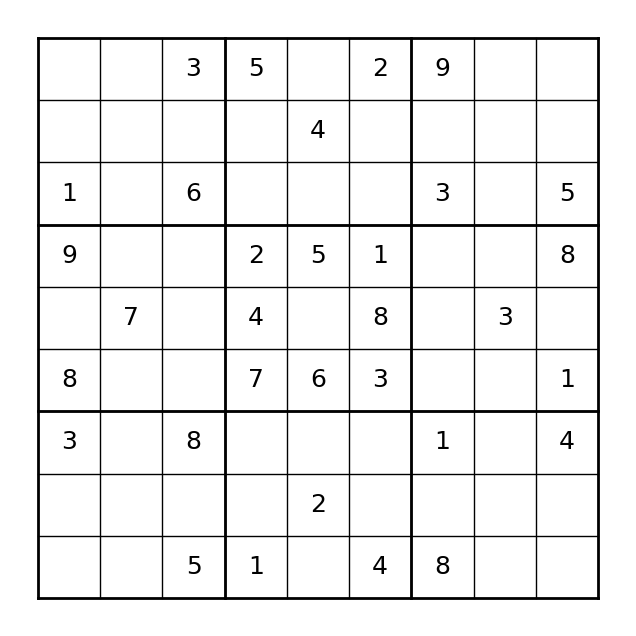

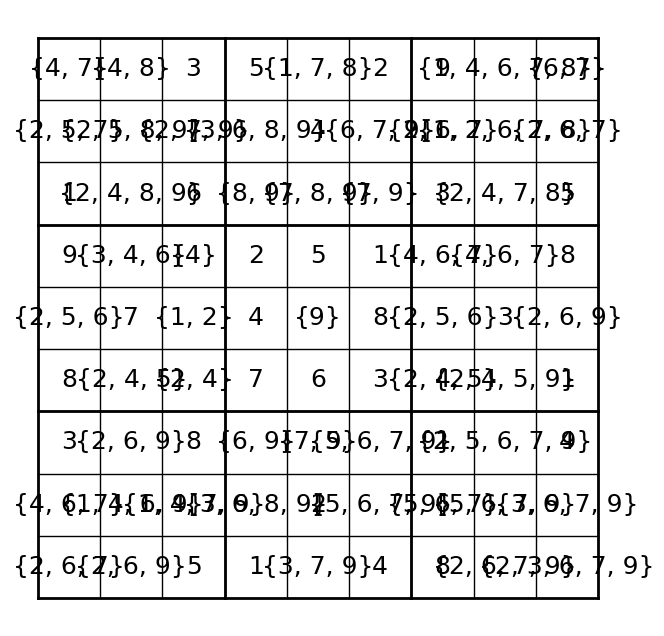

{4, 7} {4, 8} 3 5 {1, 7, 8} 2 9 {1, 4, 6, 7, 8} {6, 7}
{2, 5, 7} {2, 5, 8, 9} {2, 7, 9} {3, 6, 8, 9} 4 {6, 7, 9} {2, 6, 7} {1, 2, 6, 7, 8} {2, 6, 7}
1 {2, 4, 8, 9} 6 {8, 9} {7, 8, 9} {7, 9} 3 {2, 4, 7, 8} 5
9 {3, 4, 6} {4} 2 5 1 {4, 6, 7} {4, 6, 7} 8
{2, 5, 6} 7 {1, 2} 4 {9} 8 {2, 5, 6} 3 {2, 6, 9}
8 {2, 4, 5} {2, 4} 7 6 3 {2, 4, 5} {2, 4, 5, 9} 1
3 {2, 6, 9} 8 {6, 9} {7, 9} {5, 6, 7, 9} 1 {2, 5, 6, 7, 9} 4
{4, 6, 7} {1, 4, 6, 9} {1, 4, 7, 9} {3, 6, 8, 9} 2 {5, 6, 7, 9} {5, 6, 7} {5, 6, 7, 9} {3, 6, 7, 9}
{2, 6, 7} {2, 6, 9} 5 1 {3, 7, 9} 4 8 {2, 6, 7, 9} {2, 3, 6, 7, 9}


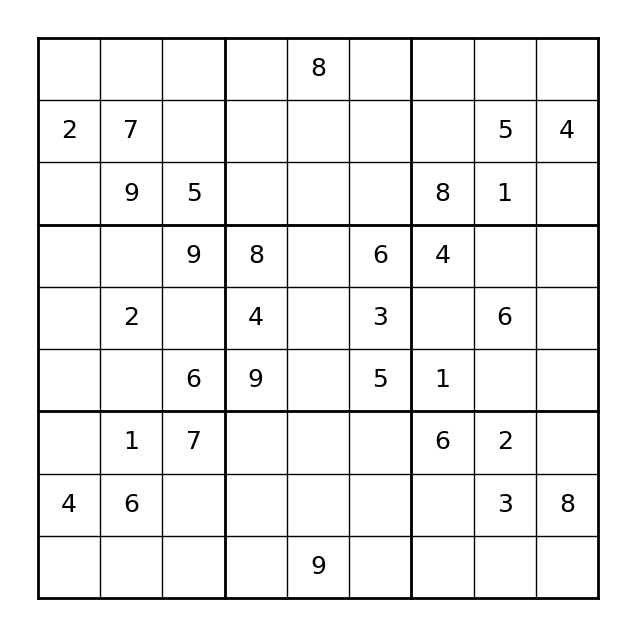

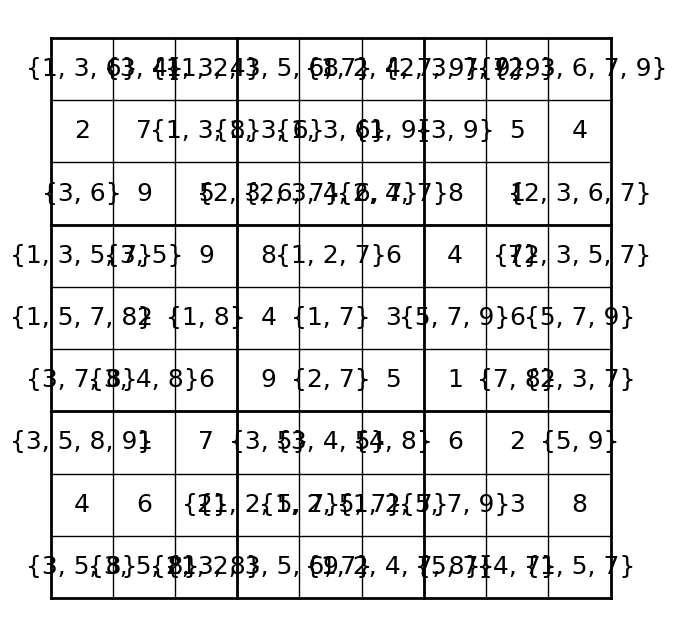

{1, 3, 6} {3, 4} {1, 3, 4} {1, 2, 3, 5, 6, 7} 8 {1, 2, 4, 7, 9} {2, 3, 7, 9} {7, 9} {2, 3, 6, 7, 9}
2 7 {1, 3, 8} {1, 3, 6} {1, 3, 6} {1, 9} {3, 9} 5 4
{3, 6} 9 5 {2, 3, 6, 7} {2, 3, 4, 6, 7} {2, 4, 7} 8 1 {2, 3, 6, 7}
{1, 3, 5, 7} {3, 5} 9 8 {1, 2, 7} 6 4 {7} {2, 3, 5, 7}
{1, 5, 7, 8} 2 {1, 8} 4 {1, 7} 3 {5, 7, 9} 6 {5, 7, 9}
{3, 7, 8} {3, 4, 8} 6 9 {2, 7} 5 1 {7, 8} {2, 3, 7}
{3, 5, 8, 9} 1 7 {3, 5} {3, 4, 5} {4, 8} 6 2 {5, 9}
4 6 {2} {1, 2, 5, 7} {1, 2, 5, 7} {1, 2, 7} {5, 7, 9} 3 8
{3, 5, 8} {3, 5, 8} {2, 3, 8} {1, 2, 3, 5, 6, 7} 9 {1, 2, 4, 7, 8} {5, 7} {4, 7} {1, 5, 7}


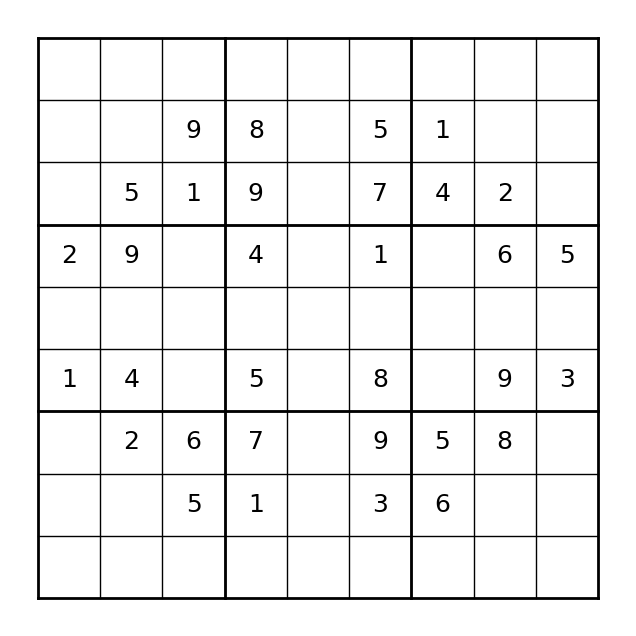

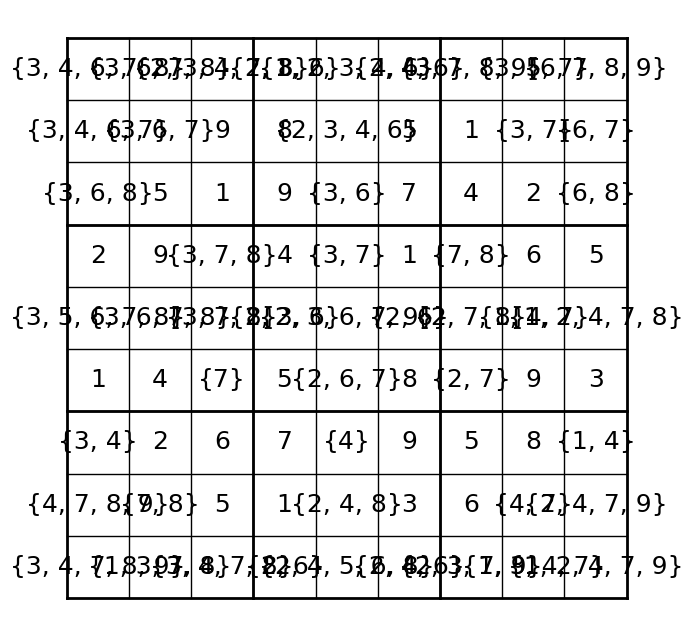

{3, 4, 6, 7, 8} {3, 6, 7, 8} {2, 3, 4, 7, 8} {2, 3, 6} {1, 2, 3, 4, 6} {2, 4, 6} {3, 7, 8, 9} {3, 5, 7} {6, 7, 8, 9}
{3, 4, 6, 7} {3, 6, 7} 9 8 {2, 3, 4, 6} 5 1 {3, 7} {6, 7}
{3, 6, 8} 5 1 9 {3, 6} 7 4 2 {6, 8}
2 9 {3, 7, 8} 4 {3, 7} 1 {7, 8} 6 5
{3, 5, 6, 7, 8} {3, 6, 7, 8} {3, 7, 8} {2, 3, 6} {2, 3, 6, 7, 9} {2, 6} {2, 7, 8} {1, 4, 7} {1, 2, 4, 7, 8}
1 4 {7} 5 {2, 6, 7} 8 {2, 7} 9 3
{3, 4} 2 6 7 {4} 9 5 8 {1, 4}
{4, 7, 8, 9} {7, 8} 5 1 {2, 4, 8} 3 6 {4, 7} {2, 4, 7, 9}
{3, 4, 7, 8, 9} {1, 3, 7, 8} {3, 4, 7, 8} {2, 6} {2, 4, 5, 6, 8} {2, 4, 6} {2, 3, 7, 9} {1, 3, 4, 7} {1, 2, 4, 7, 9}


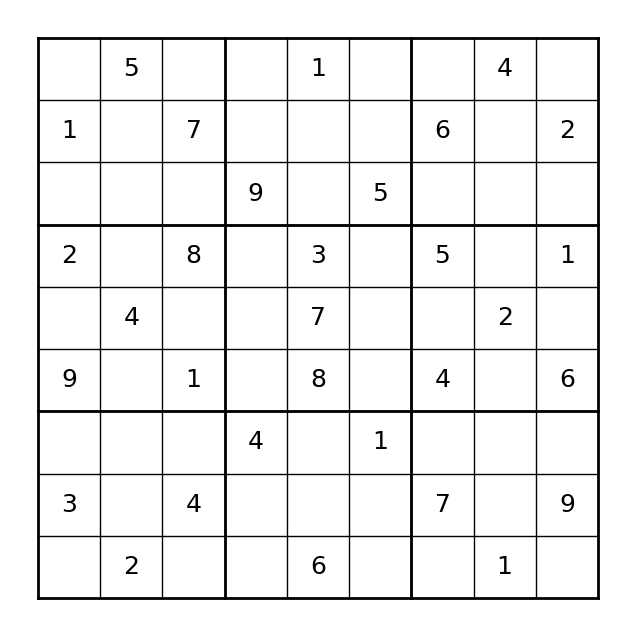

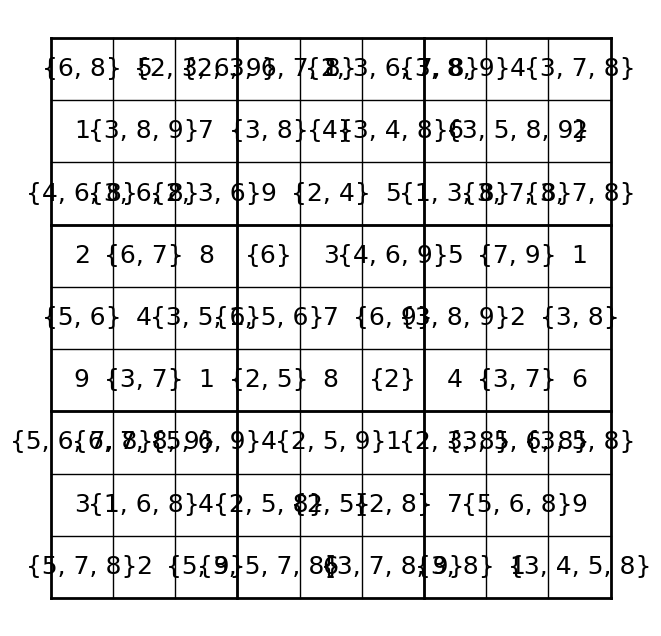

{6, 8} 5 {2, 3, 6, 9} {2, 3, 6, 7, 8} 1 {2, 3, 6, 7, 8} {3, 8, 9} 4 {3, 7, 8}
1 {3, 8, 9} 7 {3, 8} {4} {3, 4, 8} 6 {3, 5, 8, 9} 2
{4, 6, 8} {3, 6, 8} {2, 3, 6} 9 {2, 4} 5 {1, 3, 8} {3, 7, 8} {3, 7, 8}
2 {6, 7} 8 {6} 3 {4, 6, 9} 5 {7, 9} 1
{5, 6} 4 {3, 5, 6} {1, 5, 6} 7 {6, 9} {3, 8, 9} 2 {3, 8}
9 {3, 7} 1 {2, 5} 8 {2} 4 {3, 7} 6
{5, 6, 7, 8} {6, 7, 8, 9} {5, 6, 9} 4 {2, 5, 9} 1 {2, 3, 8} {3, 5, 6, 8} {3, 5, 8}
3 {1, 6, 8} 4 {2, 5, 8} {2, 5} {2, 8} 7 {5, 6, 8} 9
{5, 7, 8} 2 {5, 9} {3, 5, 7, 8} 6 {3, 7, 8, 9} {3, 8} 1 {3, 4, 5, 8}


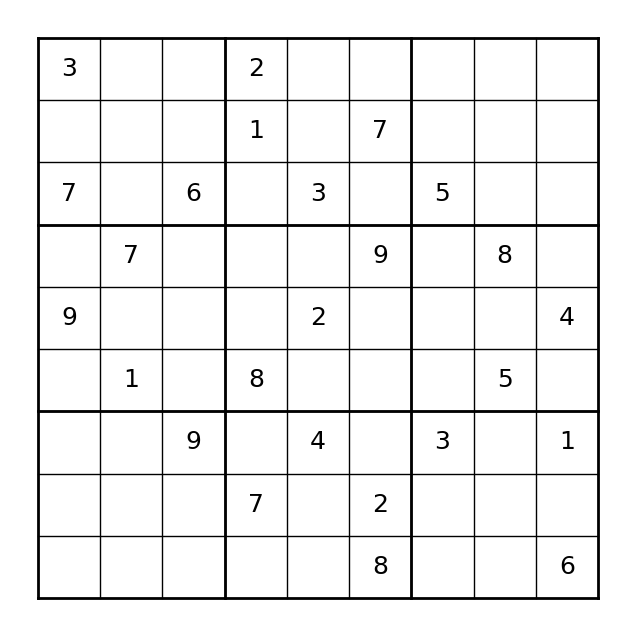

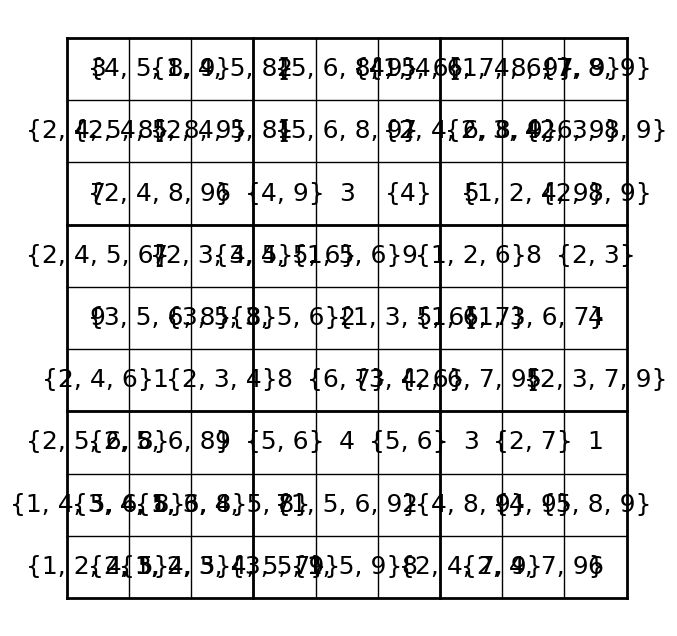

3 {4, 5, 8, 9} {1, 4, 5, 8} 2 {5, 6, 8, 9} {4, 5, 6} {1, 4, 6, 7, 8, 9} {1, 4, 6, 7, 9} {7, 8, 9}
{2, 4, 5, 8} {2, 4, 5, 8, 9} {2, 4, 5, 8} 1 {5, 6, 8, 9} 7 {2, 4, 6, 8, 9} {2, 3, 4, 6, 9} {2, 3, 8, 9}
7 {2, 4, 8, 9} 6 {4, 9} 3 {4} 5 {1, 2, 4, 9} {2, 8, 9}
{2, 4, 5, 6} 7 {2, 3, 4, 5} {3, 4, 5, 6} {1, 5, 6} 9 {1, 2, 6} 8 {2, 3}
9 {3, 5, 6, 8} {3, 5, 8} {3, 5, 6} 2 {1, 3, 5, 6} {1, 6, 7} {1, 3, 6, 7} 4
{2, 4, 6} 1 {2, 3, 4} 8 {6, 7} {3, 4, 6} {2, 6, 7, 9} 5 {2, 3, 7, 9}
{2, 5, 6, 8} {2, 5, 6, 8} 9 {5, 6} 4 {5, 6} 3 {2, 7} 1
{1, 4, 5, 6, 8} {3, 4, 5, 6, 8} {1, 3, 4, 5, 8} 7 {1, 5, 6, 9} 2 {4, 8, 9} {4, 9} {5, 8, 9}
{1, 2, 4, 5} {2, 3, 4, 5} {1, 2, 3, 4, 5, 7} {3, 5, 9} {1, 5, 9} 8 {2, 4, 7, 9} {2, 4, 7, 9} 6


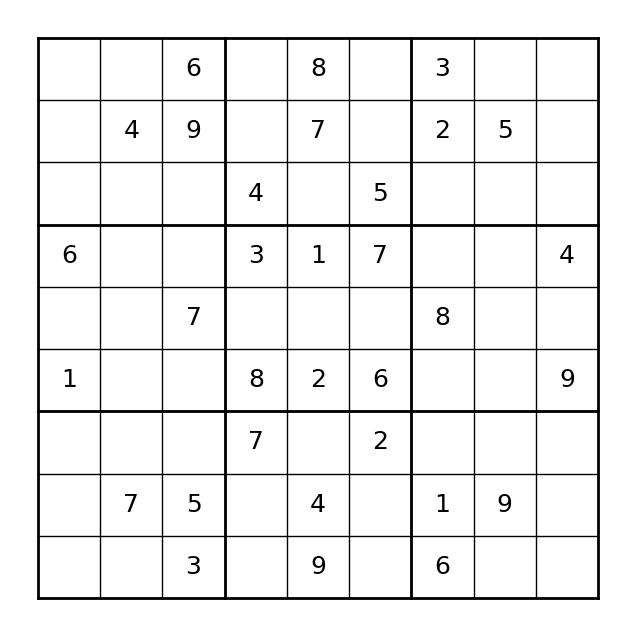

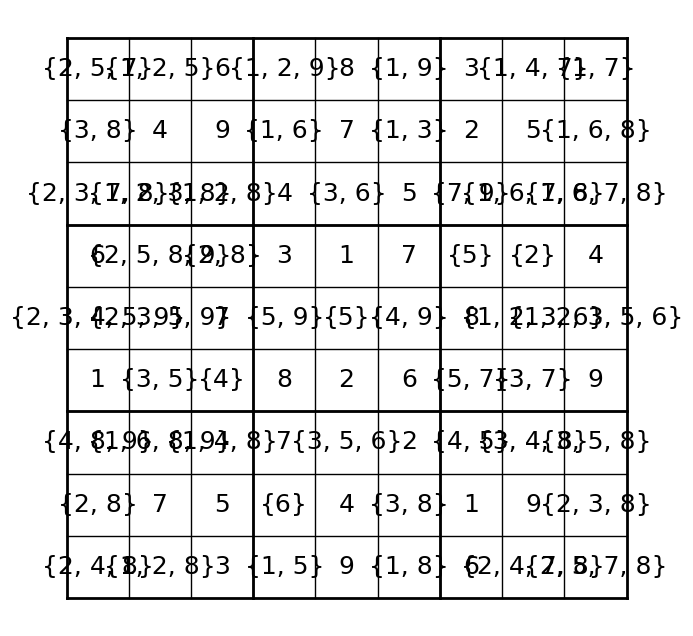

{2, 5, 7} {1, 2, 5} 6 {1, 2, 9} 8 {1, 9} 3 {1, 4, 7} {1, 7}
{3, 8} 4 9 {1, 6} 7 {1, 3} 2 5 {1, 6, 8}
{2, 3, 7, 8} {1, 2, 3, 8} {1, 2, 8} 4 {3, 6} 5 {7, 9} {1, 6, 7, 8} {1, 6, 7, 8}
6 {2, 5, 8, 9} {2, 8} 3 1 7 {5} {2} 4
{2, 3, 4, 5, 9} {2, 3, 5, 9} 7 {5, 9} {5} {4, 9} 8 {1, 2, 3, 6} {1, 2, 3, 5, 6}
1 {3, 5} {4} 8 2 6 {5, 7} {3, 7} 9
{4, 8, 9} {1, 6, 8, 9} {1, 4, 8} 7 {3, 5, 6} 2 {4, 5} {3, 4, 8} {3, 5, 8}
{2, 8} 7 5 {6} 4 {3, 8} 1 9 {2, 3, 8}
{2, 4, 8} {1, 2, 8} 3 {1, 5} 9 {1, 8} 6 {2, 4, 7, 8} {2, 5, 7, 8}


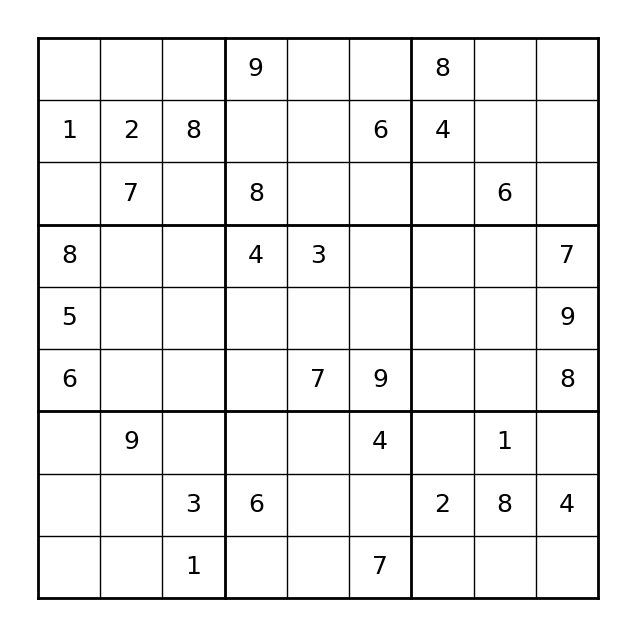

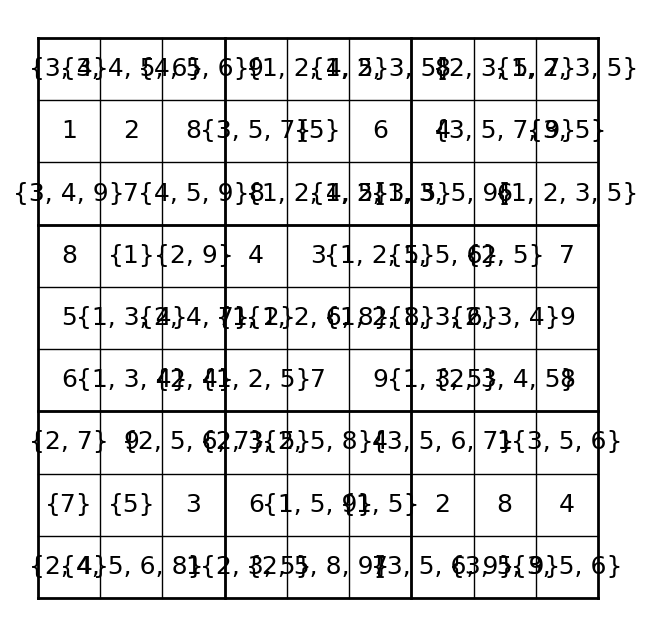

{3, 4} {3, 4, 5, 6} {4, 5, 6} 9 {1, 2, 4, 5} {1, 2, 3, 5} 8 {2, 3, 5, 7} {1, 2, 3, 5}
1 2 8 {3, 5, 7} {5} 6 4 {3, 5, 7, 9} {3, 5}
{3, 4, 9} 7 {4, 5, 9} 8 {1, 2, 4, 5} {1, 2, 3, 5} {1, 3, 5, 9} 6 {1, 2, 3, 5}
8 {1} {2, 9} 4 3 {1, 2, 5} {1, 5, 6} {2, 5} 7
5 {1, 3, 4} {2, 4, 7} {1, 2} {1, 2, 6, 8} {1, 2, 8} {1, 3, 6} {2, 3, 4} 9
6 {1, 3, 4} {2, 4} {1, 2, 5} 7 9 {1, 3, 5} {2, 3, 4, 5} 8
{2, 7} 9 {2, 5, 6, 7} {2, 3, 5} {2, 5, 8} 4 {3, 5, 6, 7} 1 {3, 5, 6}
{7} {5} 3 6 {1, 5, 9} {1, 5} 2 8 4
{2, 4} {4, 5, 6, 8} 1 {2, 3, 5} {2, 5, 8, 9} 7 {3, 5, 6, 9} {3, 5, 9} {3, 5, 6}


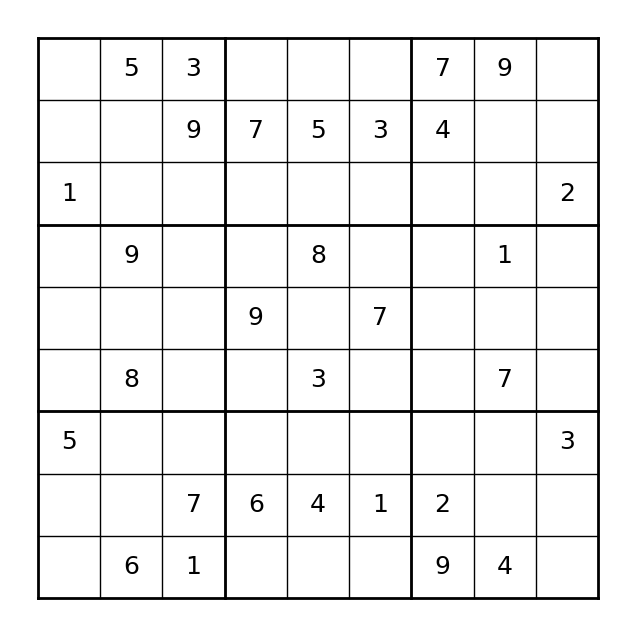

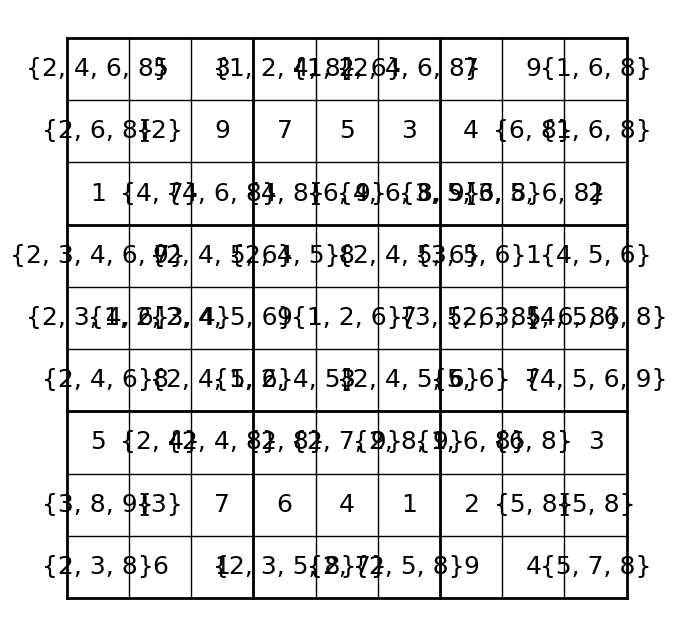

{2, 4, 6, 8} 5 3 {1, 2, 4, 8} {1, 2, 6} {2, 4, 6, 8} 7 9 {1, 6, 8}
{2, 6, 8} {2} 9 7 5 3 4 {6, 8} {1, 6, 8}
1 {4, 7} {4, 6, 8} {4, 8} {6, 9} {4, 6, 8, 9} {3, 5, 6, 8} {3, 5, 6, 8} 2
{2, 3, 4, 6, 7} 9 {2, 4, 5, 6} {2, 4, 5} 8 {2, 4, 5, 6} {3, 5, 6} 1 {4, 5, 6}
{2, 3, 4, 6} {1, 2, 3, 4} {2, 4, 5, 6} 9 {1, 2, 6} 7 {3, 5, 6, 8} {2, 3, 5, 6, 8} {4, 5, 6, 8}
{2, 4, 6} 8 {2, 4, 5, 6} {1, 2, 4, 5} 3 {2, 4, 5, 6} {5, 6} 7 {4, 5, 6, 9}
5 {2, 4} {2, 4, 8} {2, 8} {2, 7, 9} {2, 8, 9} {1, 6, 8} {6, 8} 3
{3, 8, 9} {3} 7 6 4 1 2 {5, 8} {5, 8}
{2, 3, 8} 6 1 {2, 3, 5, 8} {2, 7} {2, 5, 8} 9 4 {5, 7, 8}


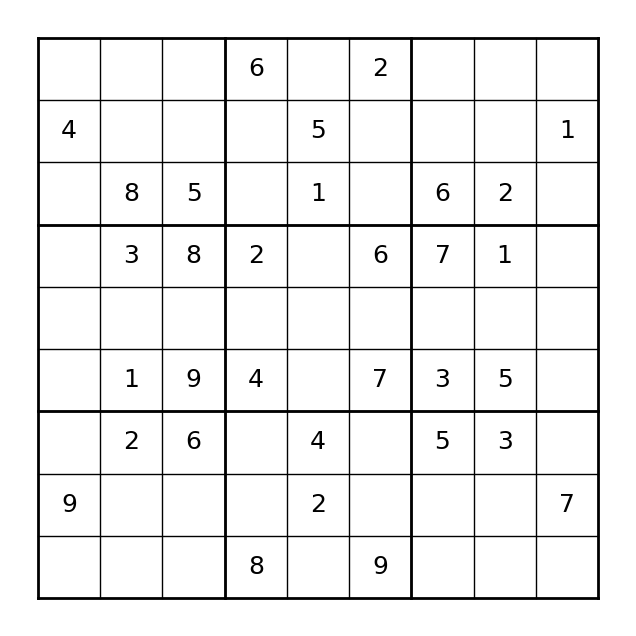

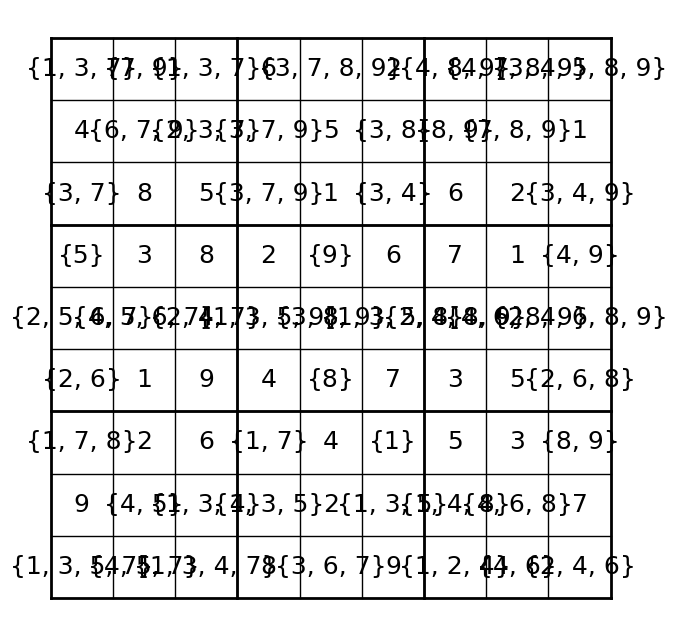

{1, 3, 7} {7, 9} {1, 3, 7} 6 {3, 7, 8, 9} 2 {4, 8, 9} {4, 7, 8, 9} {3, 4, 5, 8, 9}
4 {6, 7, 9} {2, 3, 7} {3, 7, 9} 5 {3, 8} {8, 9} {7, 8, 9} 1
{3, 7} 8 5 {3, 7, 9} 1 {3, 4} 6 2 {3, 4, 9}
{5} 3 8 2 {9} 6 7 1 {4, 9}
{2, 5, 6, 7} {4, 5, 6, 7} {2, 4, 7} {1, 3, 5, 9} {3, 8, 9} {1, 3, 5, 8} {2, 4, 8, 9} {4, 6, 8, 9} {2, 4, 6, 8, 9}
{2, 6} 1 9 4 {8} 7 3 5 {2, 6, 8}
{1, 7, 8} 2 6 {1, 7} 4 {1} 5 3 {8, 9}
9 {4, 5} {1, 3, 4} {1, 3, 5} 2 {1, 3, 5} {1, 4, 8} {4, 6, 8} 7
{1, 3, 5, 7} {4, 5, 7} {1, 3, 4, 7} 8 {3, 6, 7} 9 {1, 2, 4} {4, 6} {2, 4, 6}


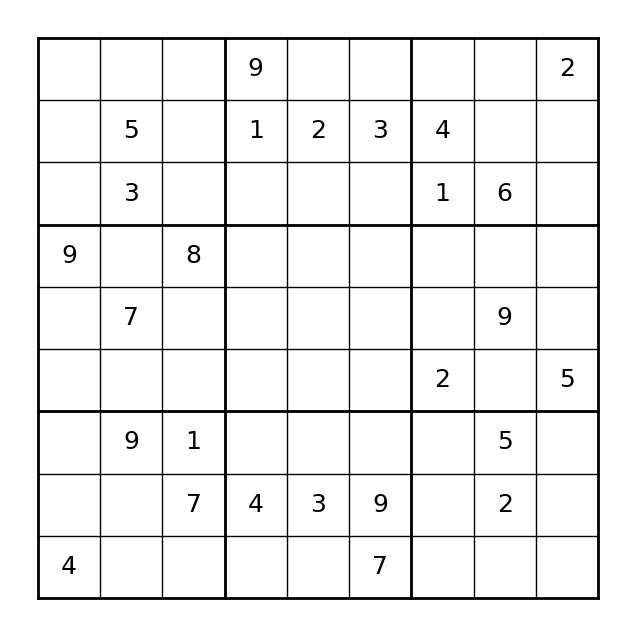

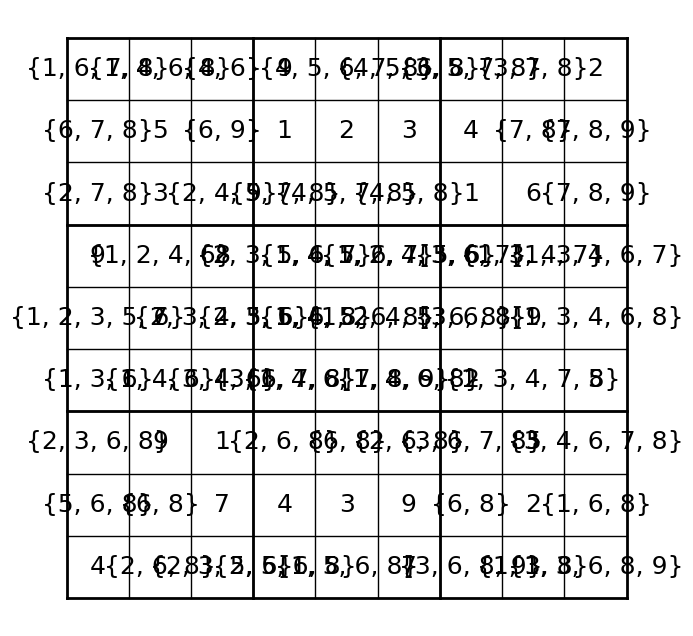

{1, 6, 7, 8} {1, 4, 6, 8} {4, 6} 9 {4, 5, 6, 7, 8} {4, 5, 6, 8} {3, 5, 7, 8} {3, 7, 8} 2
{6, 7, 8} 5 {6, 9} 1 2 3 4 {7, 8} {7, 8, 9}
{2, 7, 8} 3 {2, 4, 9} {5, 7, 8} {4, 5, 7, 8} {4, 5, 8} 1 6 {7, 8, 9}
9 {1, 2, 4, 6} 8 {2, 3, 5, 6, 7} {1, 4, 5, 6, 7} {1, 2, 4, 5, 6} {3, 6, 7} {1, 3, 4, 7} {1, 3, 4, 6, 7}
{1, 2, 3, 5, 6} 7 {2, 3, 4, 5, 6} {2, 3, 5, 6, 8} {1, 4, 5, 6, 8} {1, 2, 4, 5, 6, 8} {3, 6, 8} 9 {1, 3, 4, 6, 8}
{1, 3, 6} {1, 4, 6} {3, 4, 6} {3, 6, 7, 8} {1, 4, 6, 7, 8, 9} {1, 4, 6, 8} 2 {1, 3, 4, 7, 8} 5
{2, 3, 6, 8} 9 1 {2, 6, 8} {6, 8} {2, 6, 8} {3, 6, 7, 8} 5 {3, 4, 6, 7, 8}
{5, 6, 8} {6, 8} 7 4 3 9 {6, 8} 2 {1, 6, 8}
4 {2, 6, 8} {2, 3, 5, 6} {2, 5, 6, 8} {1, 5, 6, 8} 7 {3, 6, 8, 9} {1, 3, 8} {1, 3, 6, 8, 9}


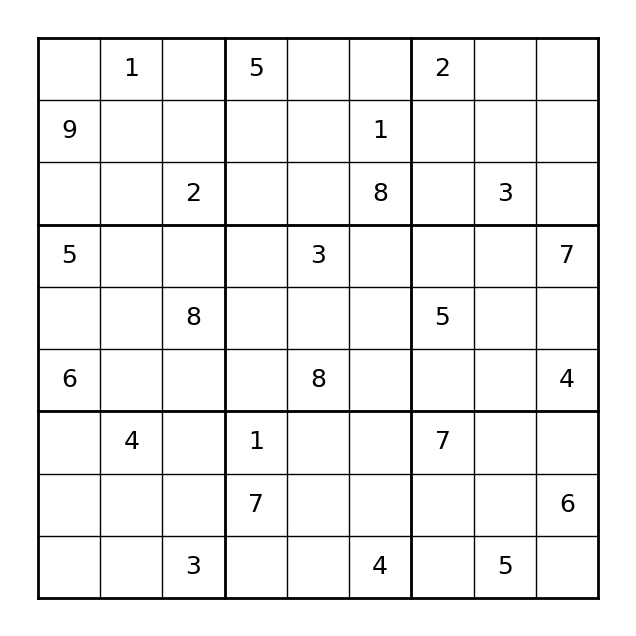

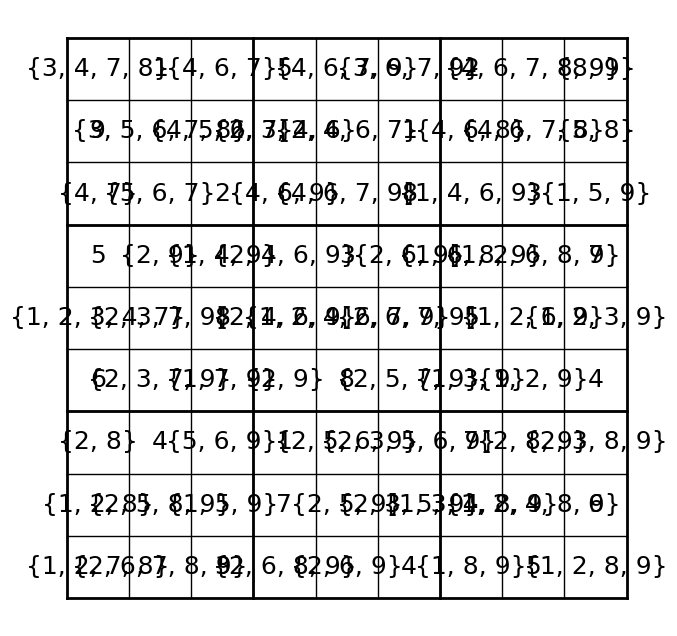

{3, 4, 7, 8} 1 {4, 6, 7} 5 {4, 6, 7, 9} {3, 6, 7, 9} 2 {4, 6, 7, 8, 9} {8, 9}
9 {3, 5, 6, 7, 8} {4, 5, 6, 7} {2, 3, 4, 6} {2, 4, 6, 7} 1 {4, 6, 8} {4, 6, 7, 8} {5, 8}
{4, 7} {5, 6, 7} 2 {4, 6, 9} {4, 6, 7, 9} 8 {1, 4, 6, 9} 3 {1, 5, 9}
5 {2, 9} {1, 4, 9} {2, 4, 6, 9} 3 {2, 6, 9} {1, 6, 8, 9} {1, 2, 6, 8, 9} 7
{1, 2, 3, 4, 7} {2, 3, 7, 9} 8 {2, 4, 6, 9} {1, 2, 4, 6, 7, 9} {2, 6, 7, 9} 5 {1, 2, 6, 9} {1, 2, 3, 9}
6 {2, 3, 7, 9} {1, 7, 9} {2, 9} 8 {2, 5, 7, 9} {1, 3, 9} {1, 2, 9} 4
{2, 8} 4 {5, 6, 9} 1 {2, 5, 6, 9} {2, 3, 5, 6, 9} 7 {2, 8, 9} {2, 3, 8, 9}
{1, 2, 8} {2, 5, 8, 9} {1, 5, 9} 7 {2, 5, 9} {2, 3, 5, 9} {1, 3, 4, 8, 9} {1, 2, 4, 8, 9} 6
{1, 2, 7, 8} {2, 6, 7, 8, 9} 3 {2, 6, 8, 9} {2, 6, 9} 4 {1, 8, 9} 5 {1, 2, 8, 9}


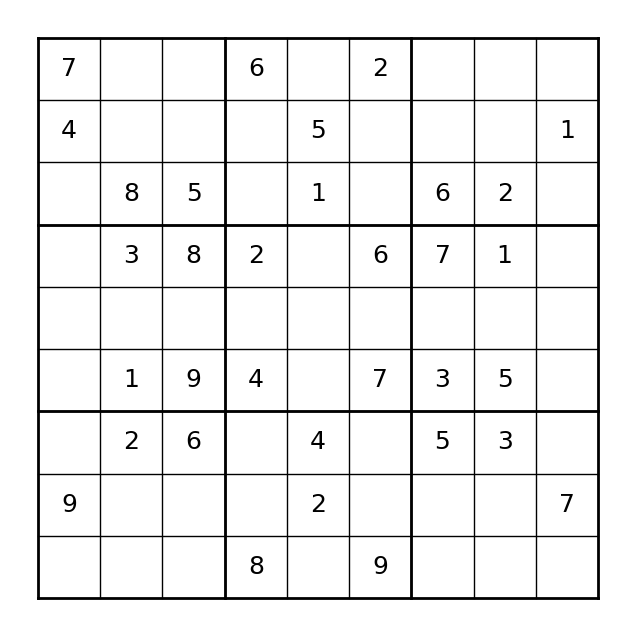

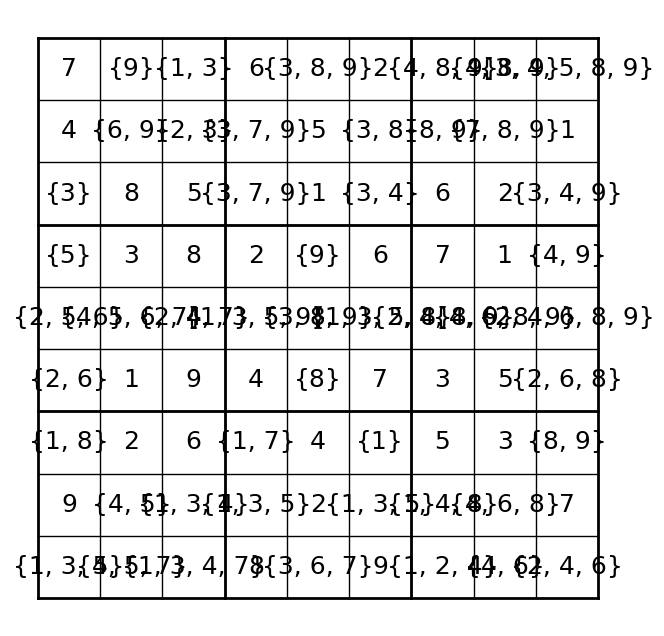

7 {9} {1, 3} 6 {3, 8, 9} 2 {4, 8, 9} {4, 8, 9} {3, 4, 5, 8, 9}
4 {6, 9} {2, 3} {3, 7, 9} 5 {3, 8} {8, 9} {7, 8, 9} 1
{3} 8 5 {3, 7, 9} 1 {3, 4} 6 2 {3, 4, 9}
{5} 3 8 2 {9} 6 7 1 {4, 9}
{2, 5, 6} {4, 5, 6, 7} {2, 4, 7} {1, 3, 5, 9} {3, 8, 9} {1, 3, 5, 8} {2, 4, 8, 9} {4, 6, 8, 9} {2, 4, 6, 8, 9}
{2, 6} 1 9 4 {8} 7 3 5 {2, 6, 8}
{1, 8} 2 6 {1, 7} 4 {1} 5 3 {8, 9}
9 {4, 5} {1, 3, 4} {1, 3, 5} 2 {1, 3, 5} {1, 4, 8} {4, 6, 8} 7
{1, 3, 5} {4, 5, 7} {1, 3, 4, 7} 8 {3, 6, 7} 9 {1, 2, 4} {4, 6} {2, 4, 6}
solved puzzles: 21
unsolved puzzles: 0
unsolvable puzzles: 0


In [28]:
f = open("easy21.txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]
print(len(ss), 'strings read')
for s in ss:
  board = convert_to_board(s)
  sudoku = Sudoku(board)
  sudoku.draw()
  sol = sudoku.solve_backtrack()
  sudoku.draw()
  if sol!=None:
    count[1]+=1
  else:
    count[-1]+=1
  print(sol)

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])


In [3]:
from google.colab import files
uploaded = files.upload()

Saving hard1000.txt to hard1000.txt


11 strings read


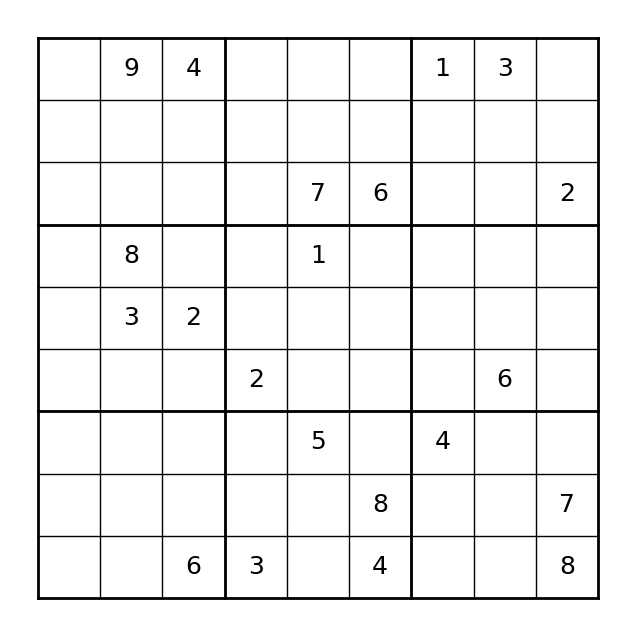

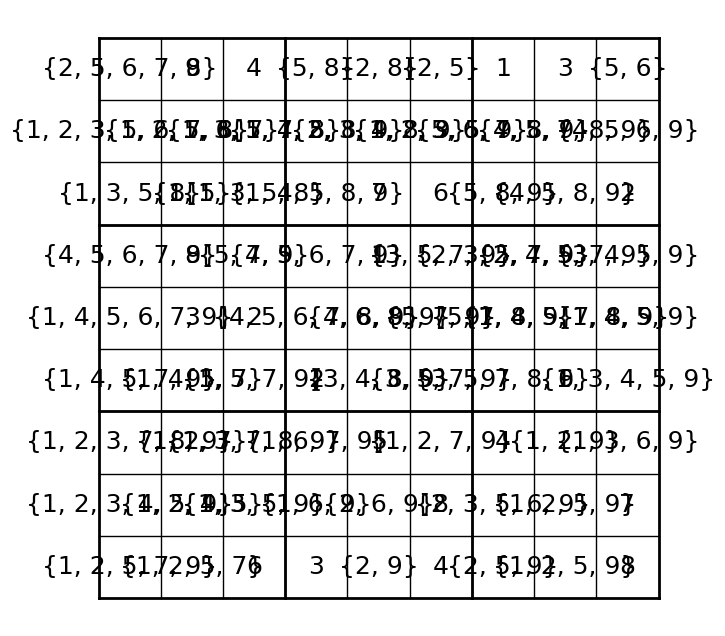

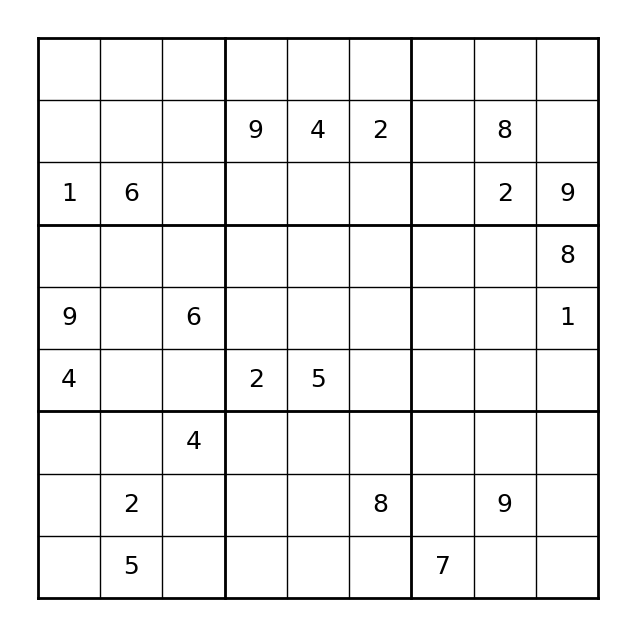

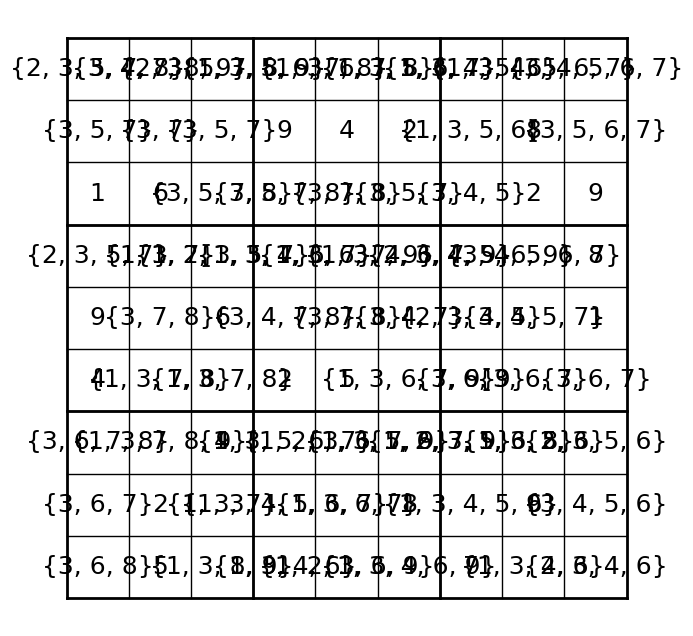

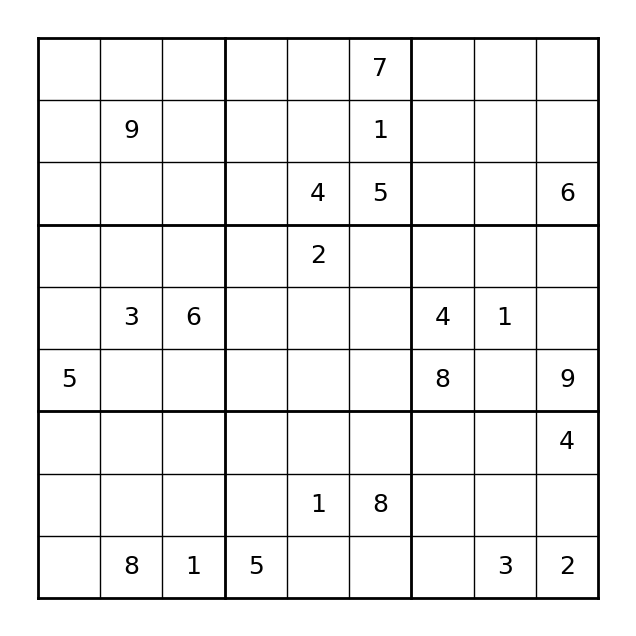

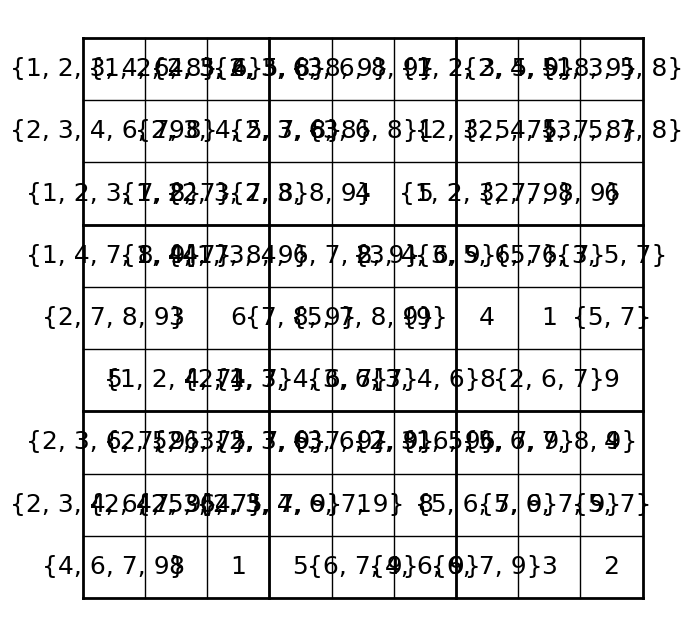

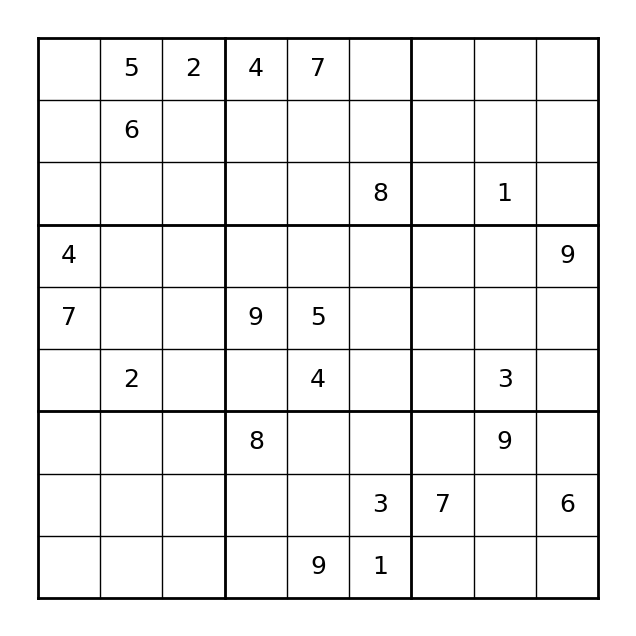

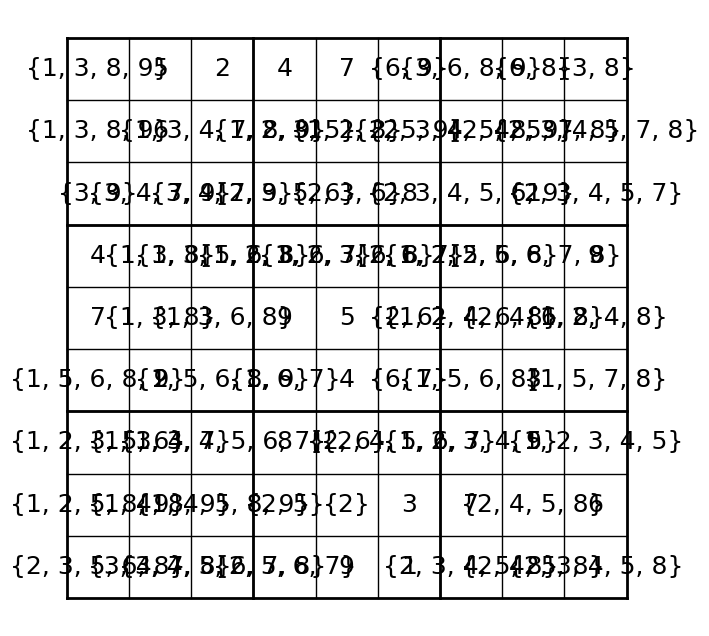

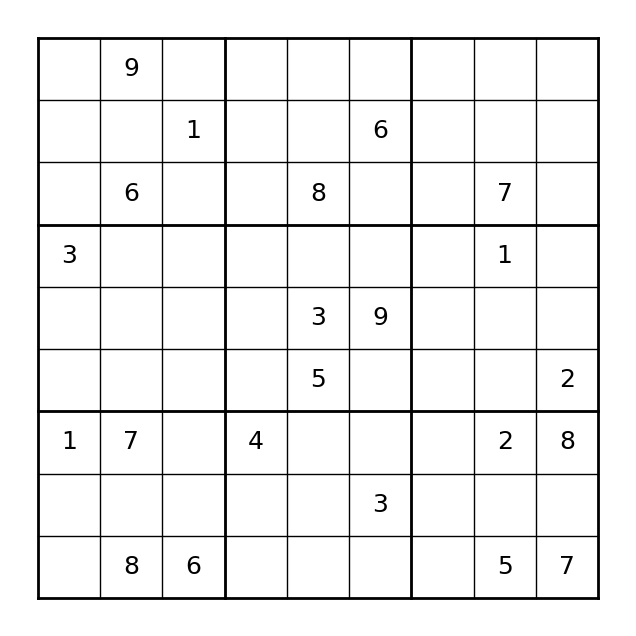

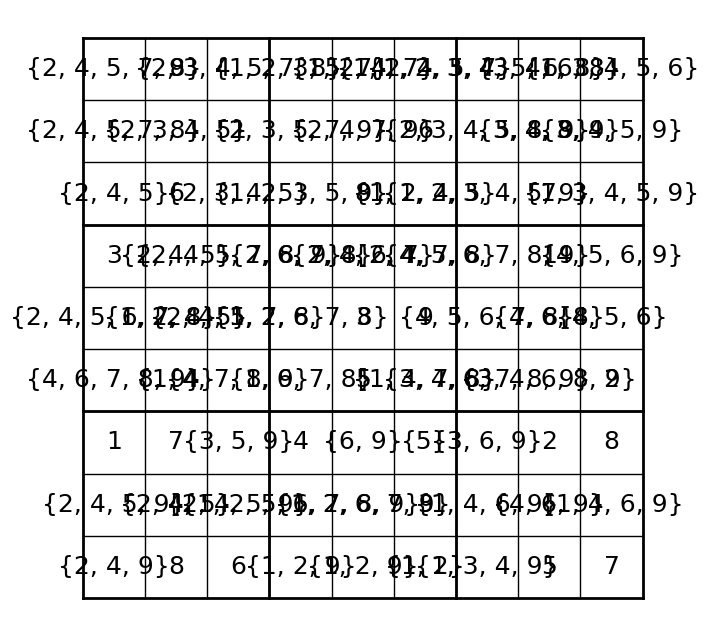

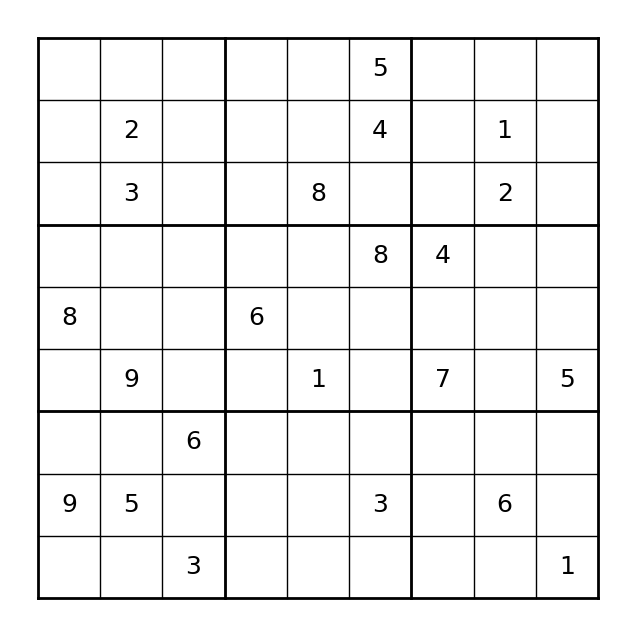

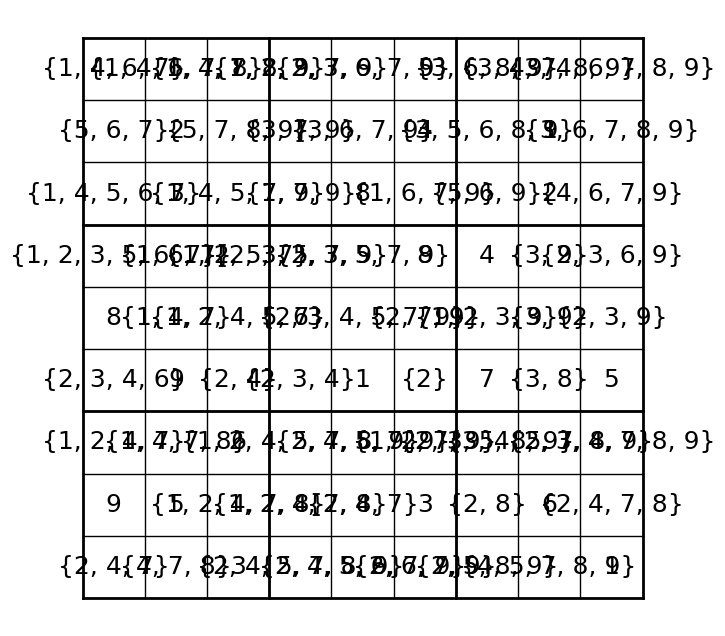

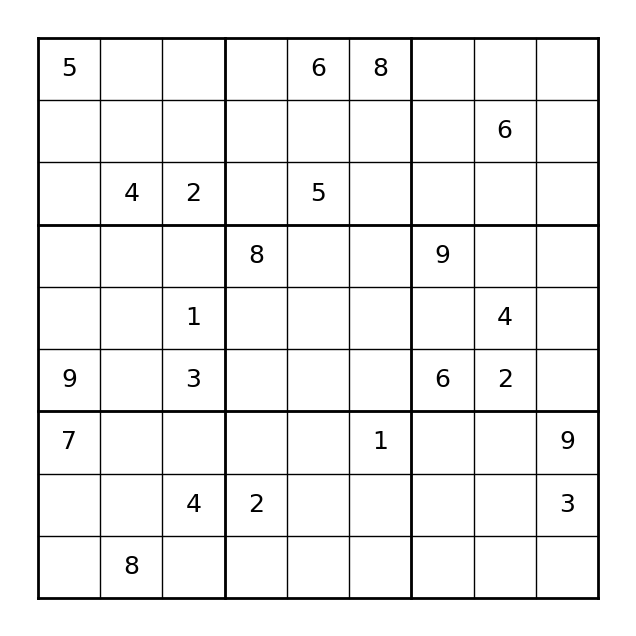

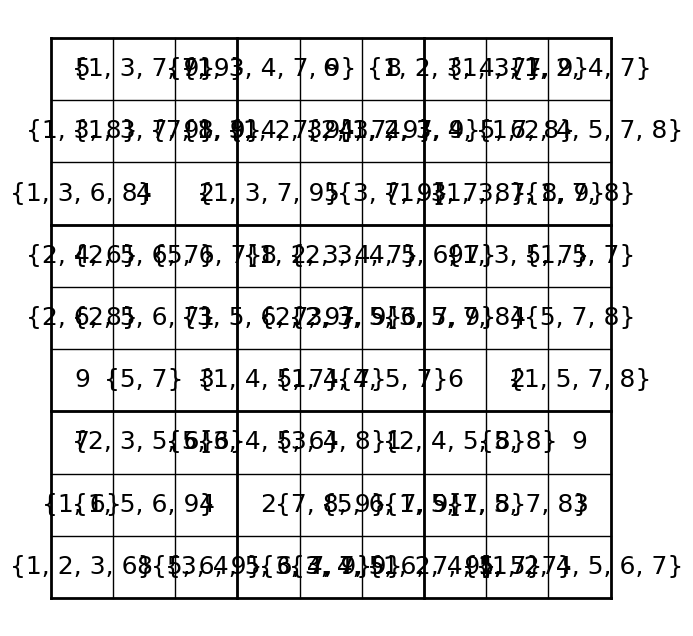

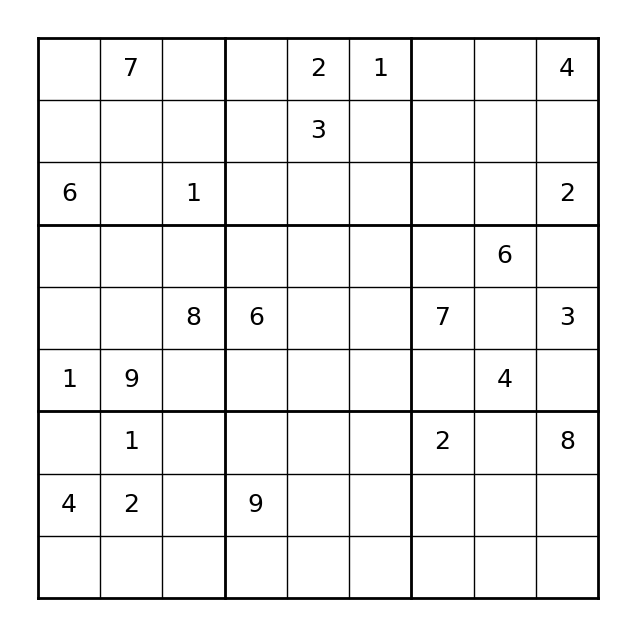

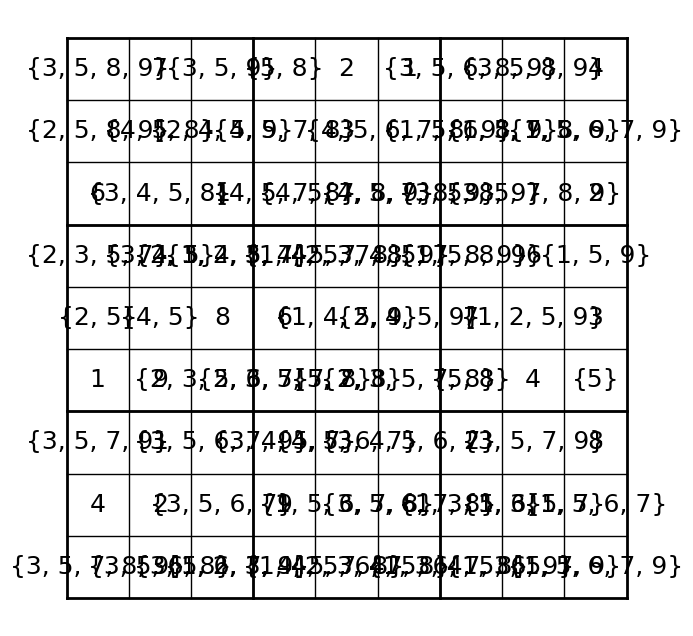

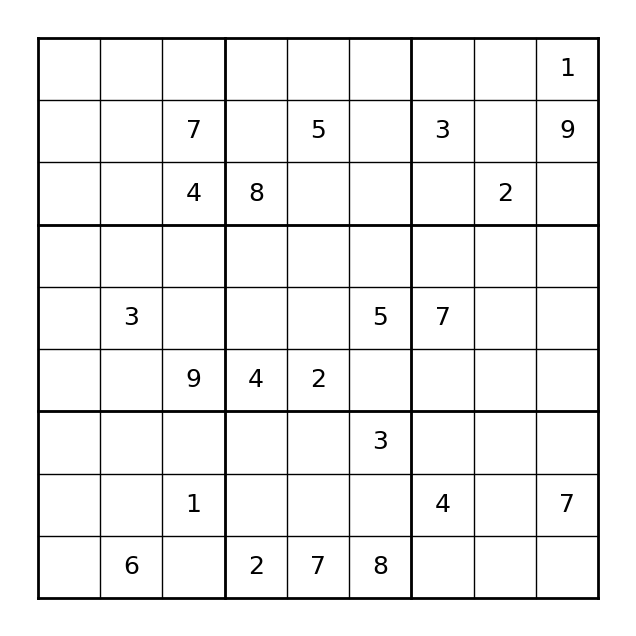

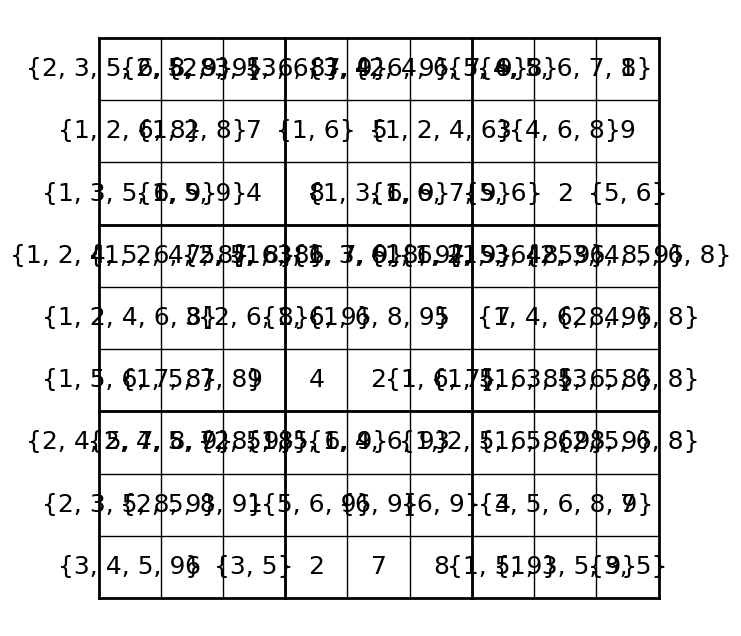

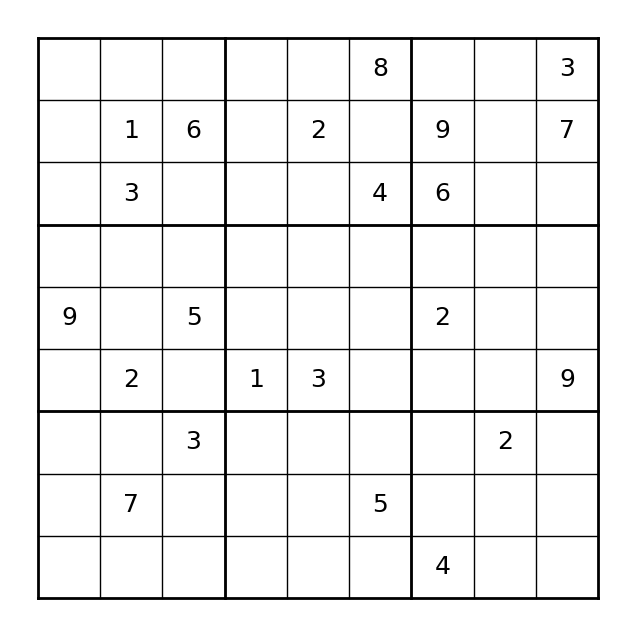

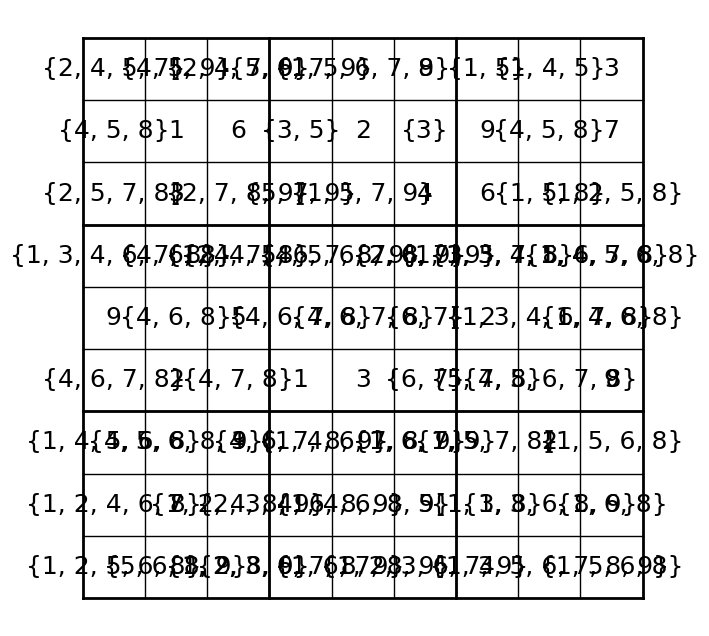

elapsed time using set 5.455559015274048 secs
solved puzzles: 10
unsolved puzzles: 0
unsolvable puzzles: 0


In [22]:
import time
f = open("hard1000.txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]
print(len(ss), 'strings read')
start = time.time()
for s in ss[:10]: # Pick the first few files for your initial experiments. Later you can try solving all of them
  board = convert_to_board(s)
  sudoku = Sudoku(board)
  sudoku.draw()
  sol = sudoku.solve_backtrack()
  sudoku.draw()
  #print('solve_backtrack(s) result:\n',sol)
  if sol!=None:
    count[1]+=1
  else:
    count[-1]+=1
elapsed_time2 = time.time() - start
print('elapsed time using set', elapsed_time2,'secs')

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])